<a href="https://colab.research.google.com/github/Mithaamalia13/Inflasi-Indonesia_Algoritma-KMedoids/blob/main/Inflasi_K_Medoids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library and Import Dataset

In [ ]:
!pip install scikit-learn-extra
!pip install waterfallcharts

In [ ]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import davies_bouldin_score, silhouette_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data19 = pd.read_csv('/content/drive/MyDrive/KMEDOIDS/data_inflasi19.csv')
data20 = pd.read_csv('/content/drive/MyDrive/KMEDOIDS/data_inflasi20.csv')
data21 = pd.read_csv('/content/drive/MyDrive/KMEDOIDS/data_inflasi21.csv')
data22 = pd.read_csv('/content/drive/MyDrive/KMEDOIDS/data_inflasi22.csv')
data23 = pd.read_csv('/content/drive/MyDrive/KMEDOIDS/data_inflasi23.csv')

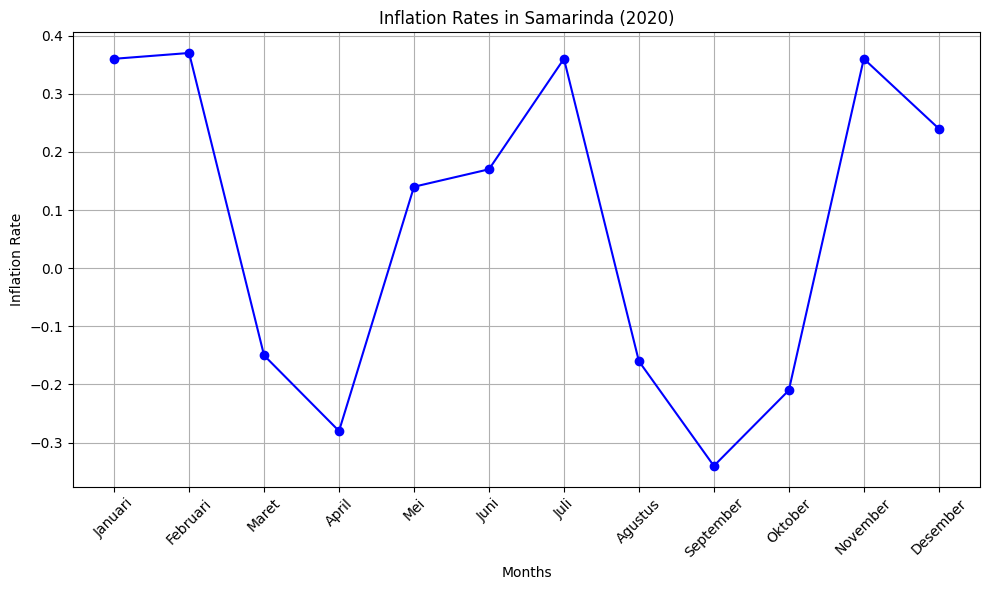

In [ ]:
import matplotlib.pyplot as plt
samarinda_data20 = data20[data20.iloc[:, 0].str.contains("KOTA SAMARINDA", case=False)]

# Extract months and inflation rates for plotting
months = data20.columns[1:]
inflation_rates = samarinda_data20.iloc[:, 1:].values.flatten()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(months, inflation_rates, marker='o', linestyle='-', color='b')
plt.title('Inflation Rates in Samarinda (2020)')
plt.xlabel('Months')
plt.ylabel('Inflation Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/waterfall_chart.py:141: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = y_height[loop] + row['amount']
/usr/local/lib/python3.10/dist-packages/waterfall_chart.py:139: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = y_height[loop]


<Figure size 1200x800 with 0 Axes>

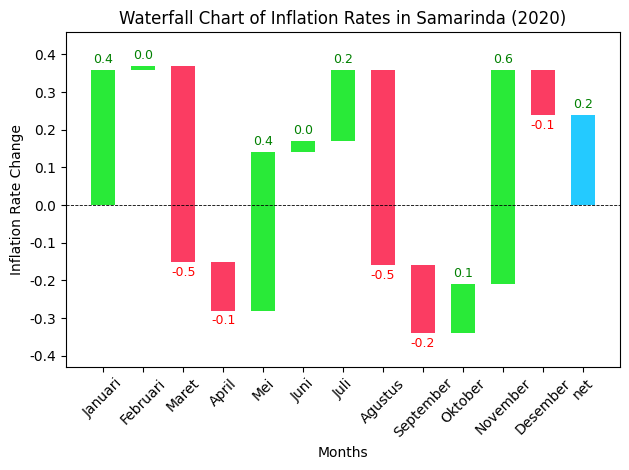

In [ ]:
import waterfall_chart
# Calculate the changes in inflation rates
inflation_changes = np.diff(inflation_rates, prepend=0)

# Create the waterfall chart
waterfall_data = pd.DataFrame({
    'months': months,
    'inflation_changes': inflation_changes
})

# Plot the waterfall chart
plt.figure(figsize=(12, 8))
waterfall_chart.plot(waterfall_data['months'], waterfall_data['inflation_changes'])
plt.title('Waterfall Chart of Inflation Rates in Samarinda (2020)')
plt.xlabel('Months')
plt.ylabel('Inflation Rate Change')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

# Data Preparation

In [ ]:
print("Data Inflasi 2019")
data19.head()

Data Inflasi 2019


,Kota,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
0,KOTA MEULABOH,0.91,-0.71,0.39,0.18,1.33,1.3,0.21,0.2,0.91,0.18,-0.5,-0.19
1,KOTA BANDA ACEH,0.43,-0.54,-0.44,0.36,1.48,0.38,-0.24,0.07,-0.55,0.07,-0.1,0.46
2,KOTA LHOKSEUMAWE,0.14,-0.68,-0.45,0.64,0.86,0.3,0.22,-0.54,-0.42,0.53,0.02,0.6
3,KOTA SIBOLGA,-0.03,-0.7,0.24,1.15,0.67,2.25,1.88,-0.58,-1.94,-0.37,-0.48,0.51
4,KOTA PEMATANG SIANTAR,0.01,-0.29,0.27,1.03,0.67,0.91,0.29,-0.4,-1.18,0.01,-0.1,0.34


In [ ]:
print("Data Inflasi 2020")
data20.head()

Data Inflasi 2020


,Kota,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
0,KOTA MEULABOH,1.44,-0.10,0.52,-0.22,0.45,-0.19,-0.09,0.88,0.15,0.32,-0.01,1.02
1,KOTA BANDA ACEH,0.77,0.54,0.61,-0.08,0.31,-0.18,-0.34,0.44,-0.32,0.62,0.19,0.85
2,KOTA LHOKSEUMAWE,0.08,0.49,0.64,-0.29,0.05,-0.07,-0.35,0.30,0.24,0.86,0.30,1.27
3,KOTA SIBOLGA,0.20,0.69,-0.79,-0.66,0.17,0.13,-0.31,-0.01,0.29,1.04,0.34,1.32
4,KOTA PEMATANG SIANTAR,0.62,0.12,-0.12,-0.40,0.37,-0.13,-0.76,0.20,0.29,0.46,0.64,1.47


In [ ]:
print("Data Inflasi 2021")
data21.head()

Data Inflasi 2021


,Kota,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
0,KOTA MEULABOH,0.83,-0.95,-0.57,0.54,0.79,-0.06,0.20,-0.03,-0.59,0.62,0.48,0.81
1,KOTA BANDA ACEH,0.77,-0.56,-0.45,0.53,0.17,-0.05,-0.14,0.26,-0.13,0.38,0.87,0.74
2,KOTA LHOKSEUMAWE,0.80,-0.70,-0.09,0.42,0.19,-0.07,-0.07,-0.21,-0.16,0.45,0.82,0.59
3,KOTA SIBOLGA,0.74,-0.68,-0.29,0.35,-0.30,0.31,0.62,0.05,0.32,0.11,0.47,0.17
4,KOTA PEMATANG SIANTAR,1.13,-0.46,-0.23,0.05,0.08,0.23,-0.03,-0.07,0.31,-0.36,0.58,0.85


In [ ]:
print("Data Inflasi 2022")
data22.head()

Data Inflasi 2022


,Kota,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
0,KOTA MEULABOH,0.95,-0.87,0.69,1.22,1.26,1.33,1.12,-0.33,0.49,0.19,-0.62,0.98
1,KOTA BANDA ACEH,1.01,-0.34,0.59,1.23,0.92,0.76,0.98,-0.32,0.78,-0.49,0.11,0.64
2,KOTA LHOKSEUMAWE,1.12,-0.99,0.85,1.25,1.03,0.45,0.47,-0.98,0.90,0.04,-0.36,1.51
3,KOTA SIBOLGA,1.53,-0.21,0.93,0.38,0.85,1.12,1.07,-0.02,0.33,-1.09,-0.05,1.44
4,KOTA PEMATANG SIANTAR,0.96,0.18,0.77,0.39,0.62,1.36,0.04,-0.79,1.50,-0.54,-0.08,1.61


In [ ]:
print("Data Inflasi 2023")
data23.head()

Data Inflasi 2023


,Kota,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
0,KOTA MEULABOH,0.76,0.39,-0.66,-0.70,0.58,0.47,0.22,0.06,0.45,0.30,0.22,-0.67
1,KOTA BANDA ACEH,0.61,0.57,-0.57,0.18,0.13,0.06,0.30,-0.27,0.14,-0.25,0.38,0.25
2,KOTA LHOKSEUMAWE,0.75,0.51,-0.31,-0.42,0.51,0.07,-0.04,0.03,0.27,-0.11,0.19,0.12
3,KOTA SIBOLGA,1.46,0.32,-0.66,0.27,0.16,0.62,0.35,0.13,0.44,-0.19,-0.19,0.08
4,KOTA PEMATANG SIANTAR,0.98,-0.04,-0.30,-0.25,0.45,0.52,0.10,-0.11,0.16,-0.15,0.37,0.56


# Normalisasi dan Cleaning Data

In [ ]:
def replace_missing_with_mean(df):
  df.replace('-', np.nan, inplace=True)
  df = df.apply(pd.to_numeric, errors='coerce')
  df.fillna(df.mean(), inplace=True)
  return df


In [ ]:
#2019
data19.iloc[:, 1:] = replace_missing_with_mean(data19.iloc[:, 1:])
features19 = data19.drop(columns='Kota').values
#Scaler
scaler19 = StandardScaler()
scaled_features19 = scaler19.fit_transform(features19)
# Apply PCA
pca19 = PCA(n_components=2)
reduced_features19 = pca19.fit_transform(scaled_features19)

#------------------------------------------------------------------------------------

#2020
data20.iloc[:, 1:] = replace_missing_with_mean(data20.iloc[:, 1:])
features20 = data20.drop(columns='Kota').values
#Scaler
scaler20 = StandardScaler()
scaled_features20 = scaler20.fit_transform(features20)
# Apply PCA
pca20 = PCA(n_components=2)
reduced_features20 = pca20.fit_transform(scaled_features20)

#------------------------------------------------------------------------------------

#2021
data21.iloc[:, 1:] = replace_missing_with_mean(data21.iloc[:, 1:])
features21 = data21.drop(columns='Kota').values
#Scaler
scaler21 = StandardScaler()
scaled_features21 = scaler21.fit_transform(features21)
# Apply PCA
pca21 = PCA(n_components=2)
reduced_features21 = pca21.fit_transform(scaled_features21)

#------------------------------------------------------------------------------------

#2022
data22.iloc[:, 1:] = replace_missing_with_mean(data22.iloc[:, 1:])
features22 = data22.drop(columns='Kota').values
#Scaler
scaler22 = StandardScaler()
scaled_features22 = scaler22.fit_transform(features22)
# Apply PCA
pca22 = PCA(n_components=2)
reduced_features22 = pca22.fit_transform(scaled_features22)

#------------------------------------------------------------------------------------

#2023
data23.iloc[:, 1:] = replace_missing_with_mean(data23.iloc[:, 1:])
features23 = data23.drop(columns='Kota').values
#Scaler
scaler23 = StandardScaler()
scaled_features23 = scaler23.fit_transform(features23)

# Apply PCA
pca23 = PCA(n_components=2)
reduced_features23 = pca23.fit_transform(scaled_features23)

<ipython-input-96-6214c03286e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('-', np.nan, inplace=True)


In [ ]:
scaled_features20A = pd.DataFrame(scaled_features19)

# Membulatkan ke 6 angka di belakang koma
df_rounded = scaled_features20A.round(6)

df_rounded

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.539927,-0.989783,0.910950,-0.673688,1.030218,1.218676,0.046514,0.478939,2.757204,0.555956,-1.261985,-1.420536
1,0.157995,-0.636904,-1.009721,-0.140231,1.318342,-0.348074,-0.886290,0.212890,-0.515575,0.179193,-0.479654,0.239143
2,-0.676922,-0.927511,-1.032861,0.689591,0.127430,-0.484314,0.067243,-1.035498,-0.224163,1.754751,-0.244955,0.596613
3,-1.166356,-0.969026,0.563841,2.201052,-0.237526,2.836516,3.508253,-1.117359,-3.631439,-1.327863,-1.222868,0.366811
4,-1.051195,-0.117964,0.633263,1.845414,-0.237526,0.554510,0.212346,-0.748982,-1.927801,-0.026315,-0.479654,-0.067259
...,...,...,...,...,...,...,...,...,...,...,...,...
85,1.885410,0.317946,0.193591,-2.837153,2.797377,-0.348074,-1.570346,1.727327,-0.425910,2.953545,0.302676,0.800881
86,0.157995,-1.197359,-1.773361,-0.821871,1.107051,-0.637583,0.917131,0.458474,1.232896,-1.396366,-1.966082,0.749814
87,-1.108776,-3.895848,0.725825,2.349235,-2.465683,-0.620553,-1.404514,-0.298744,-1.501892,-0.505833,2.082477,1.260485
88,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
reduced_features20A = pd.DataFrame(reduced_features22)
reduced_features20A

,0,1
0,-2.190930,-0.889558
1,-0.624187,-0.522147
2,-2.299830,-0.299419
3,-2.637222,0.738235
4,-1.139786,2.878289
...,...,...
85,-2.227198,-4.263977
86,-0.493884,-0.705255
87,-0.592355,0.297365
88,1.055479,-3.932482


In [ ]:
# Print PCA loading scores
loading_scores = pca22.components_.T
print("PCA Loading Scores:")
for i, component in enumerate(loading_scores.T):
    print(f"Component {i+1}: {component}")

PCA Loading Scores:
Component 1: [-0.22814489  0.35980953 -0.19913432  0.00778555 -0.27375912 -0.28469555
 -0.21351018  0.43544664  0.24882726  0.32946177  0.24971786 -0.39339149]
Component 2: [ 0.33315538  0.39008134  0.15242778 -0.33909471 -0.15394014  0.33315857
 -0.38709802 -0.19309235  0.429556   -0.15868978 -0.24755973 -0.07626426]


# **FUNGSI PERHITUNGAN K MEDOIDS**

In [ ]:
# Function definitions for k-medoids clustering
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def manhattan_distance(a, b):
    return np.sum(np.abs(a - b))

def minkowski_distance(a, b, p=3):
    return np.sum(np.abs(a - b) ** p) ** (1 / p)

def initialize_medoids(X, k, random_state=24):
    np.random.seed(random_state)
    return X[np.random.choice(X.shape[0], k, replace=False)]

def assign_clusters(X, medoids, distance_metric):
    clusters = {}
    for x in X:
        distances = [distance_metric(x, medoid) for medoid in medoids]
        cluster = np.argmin(distances)
        if cluster not in clusters:
            clusters[cluster] = []
        clusters[cluster].append(x)
    return clusters

def update_medoids(clusters, distance_metric):
    new_medoids = []
    for key in clusters.keys():
        cluster_points = np.array(clusters[key])
        medoid = cluster_points[np.argmin([np.sum([distance_metric(p1, p2) for p2 in cluster_points]) for p1 in cluster_points])]
        new_medoids.append(medoid)
    return new_medoids


def k_medoids(X, k, distance_metric=euclidean_distance, max_iter=100):
    medoids = initialize_medoids(X, k)
    iteration = 0  # Variabel untuk menghitung iterasi
    for _ in range(max_iter):
        iteration += 1  # Increment iterasi setiap loop
        clusters = assign_clusters(X, medoids, distance_metric)
        new_medoids = update_medoids(clusters, distance_metric)
        if np.all([np.array_equal(m, nm) for m, nm in zip(medoids, new_medoids)]):
            break
        medoids = new_medoids
    return clusters, medoids


def calculate_dbi(X, labels, k, distance_metric):
    cluster_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    scatter_within = np.zeros(k)
    # print("Centroids used for DBI calculation:")
    # print(cluster_centroids)

    for i in range(k):
        cluster_points = X[labels == i]
        scatter_within[i] = np.mean([distance_metric(p, cluster_centroids[i]) for p in cluster_points])
        # print(f"Scatter within for cluster {i}: {scatter_within[i]}")

    dbi = 0
    for i in range(k):
        max_ratio = 0
        for j in range(k):
            if i != j:
                scatter_between = distance_metric(cluster_centroids[i], cluster_centroids[j])
                ratio = (scatter_within[i] + scatter_within[j]) / scatter_between
                # print(f"Ratio for clusters {i} and {j}: {ratio}")
                # print(f"Scatter between clusters {i} and {j}: {scatter_between}")
                max_ratio = max(max_ratio, ratio)
                # print(f"Max ratio for cluster {i}: {max_ratio}")
        dbi += max_ratio
    dbi /= k
    return dbi

def silhouette_score(X, labels, distance_metric=euclidean_distance):
    n_samples = len(X)
    unique_labels = np.unique(labels)
    k = len(unique_labels)

    # Calculate the pairwise distance matrix
    distance_matrix = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            distance_matrix[i, j] = distance_metric(X[i], X[j])

    # Calculate the Silhouette Coefficient for each sample
    silhouette_values = np.zeros(n_samples)
    for i in range(n_samples):
        same_cluster_mask = (labels == labels[i])
        other_cluster_mask = ~same_cluster_mask

        a_i = np.mean(distance_matrix[i, same_cluster_mask])  # Mean distance to points in the same cluster
        b_i = np.min([np.mean(distance_matrix[i, labels == label]) for label in unique_labels if label != labels[i]])  # Min mean distance to points in other clusters

        silhouette_values[i] = (b_i - a_i) / max(a_i, b_i)


    return np.mean(silhouette_values)

In [ ]:
from scipy.stats import mode
import numpy as np

# Rentang K yang akan diuji
k_range = range(3, 9, 2)

# Data dari masing-masing tahun setelah PCA
datasets = {
    '2019': reduced_features19,
    '2020': reduced_features20,
    '2021': reduced_features21,
    '2022': reduced_features22,
    '2023': reduced_features23,
}

# Metrik jarak yang akan diuji
distance_metrics = {
    'euclidean': euclidean_distance,
    'manhattan': manhattan_distance,
    'minkowski': minkowski_distance,
}

# Metode evaluasi yang akan diuji
evaluation_methods = ['dbi', 'sc']

def find_best_k(X, k_range, method='dbi', distance_metric=euclidean_distance):
    best_k = None
    best_score = np.inf if method == 'dbi' else -np.inf

    for k in k_range:
        # Lakukan clustering menggunakan k-medoids
        clusters, medoids = k_medoids(X, k, distance_metric=distance_metric)

        # Membuat label untuk setiap data poin berdasarkan cluster terdekat
        labels = np.zeros(X.shape[0])
        for i, cluster_points in clusters.items():
            for point in cluster_points:
                point_idx = np.where((X == point).all(axis=1))[0][0]
                labels[point_idx] = i

        # Evaluasi metode (DBI atau Silhouette Coefficient)
        if method == 'dbi':
            score = calculate_dbi(X, labels, k, distance_metric)
        elif method == 'sc':
            score = silhouette_score(X, labels, distance_metric=distance_metric)

        # Jika metode adalah DBI, pilih nilai K dengan nilai DBI terendah
        # Jika metode adalah SC, pilih nilai K dengan nilai Silhouette tertinggi
        if (method == 'dbi' and score < best_score) or (method == 'sc' and score > best_score):
            best_score = score
            best_k = k

    return best_k


# Menyimpan hasil K terbaik dari setiap kombinasi tahun, metode evaluasi, dan metrik jarak
best_ks = []

# Menemukan K terbaik untuk setiap kombinasi tahun, metode evaluasi, dan metrik jarak
for method in evaluation_methods:
    for metric_name, metric_func in distance_metrics.items():
        for year, X in datasets.items():
            best_k = find_best_k(X, k_range, method=method, distance_metric=metric_func)
            best_ks.append(best_k)

# Menghitung modus K terbaik secara keseluruhan
best_k_overall_mode_result = mode(best_ks)
best_k_overall_mode = best_k_overall_mode_result.mode[0] if isinstance(best_k_overall_mode_result.mode, np.ndarray) else best_k_overall_mode_result.mode

# Menampilkan hasil modus nilai K terbaik secara keseluruhan
print(f"Modus K terbaik secara keseluruhan: {best_k_overall_mode}")

# Menyimpan hasil K terbaik dari setiap kombinasi tahun, metode evaluasi, dan metrik jarak
results = []

# Menemukan K terbaik untuk setiap kombinasi tahun, metode evaluasi, dan metrik jarak
for method in evaluation_methods:
    for metric_name, metric_func in distance_metrics.items():
        for year, X in datasets.items():
            best_k = find_best_k(X, k_range, method=method, distance_metric=metric_func)
            results.append({'Year': year, 'Method': method.upper(), 'Distance Metric': metric_name.capitalize(), 'Best K': best_k})

# Mengonversi hasil menjadi DataFrame
results_df = pd.DataFrame(results)

# Menampilkan tabel
results_df



Modus K terbaik secara keseluruhan: 3


,Year,Method,Distance Metric,Best K
0,2019,DBI,Euclidean,5
1,2020,DBI,Euclidean,7
2,2021,DBI,Euclidean,3
3,2022,DBI,Euclidean,5
4,2023,DBI,Euclidean,7
5,2019,DBI,Manhattan,7
6,2020,DBI,Manhattan,3
7,2021,DBI,Manhattan,7
8,2022,DBI,Manhattan,5
9,2023,DBI,Manhattan,5


In [ ]:
# Perform k-medoids clustering with k=3 for different distance metrics
k = 3

# ECLUIDEAN DISTANCE

In [ ]:
# Euclidean distance 2019
clusters_euclidean19, medoids_euclidean19 = k_medoids(reduced_features19, k, distance_metric=euclidean_distance)
labels_euclidean19 = np.zeros(len(reduced_features19))
for cluster19, points in clusters_euclidean19.items():
    for point in points:
        index19 = np.where(np.all(reduced_features19 == point, axis=1))
        labels_euclidean19[index19] = cluster19
dbi_euclidean19 = calculate_dbi(reduced_features19, labels_euclidean19, k, distance_metric=euclidean_distance)
silhouette_euclidean19 = silhouette_score(reduced_features19, labels_euclidean19, distance_metric=euclidean_distance)

# ---------------------------------------------------------------------------------------------------------------------

# Euclidean distance 2020
clusters_euclidean20, medoids_euclidean20 = k_medoids(reduced_features20, k, distance_metric=euclidean_distance)
labels_euclidean20 = np.zeros(len(reduced_features20))
for cluster20, points in clusters_euclidean20.items():
    for point in points:
        index20 = np.where(np.all(reduced_features20 == point, axis=1))
        labels_euclidean20[index20] = cluster20
dbi_euclidean20 = calculate_dbi(reduced_features20, labels_euclidean20, k, distance_metric=euclidean_distance)
silhouette_euclidean20 = silhouette_score(reduced_features20, labels_euclidean20, distance_metric=euclidean_distance)

# ---------------------------------------------------------------------------------------------------------------------

# Euclidean distance 2021
clusters_euclidean21, medoids_euclidean21 = k_medoids(reduced_features21, k, distance_metric=euclidean_distance)
labels_euclidean21 = np.zeros(len(reduced_features21))
for cluster21, points in clusters_euclidean21.items():
    for point in points:
        index21 = np.where(np.all(reduced_features21 == point, axis=1))
        labels_euclidean21[index21] = cluster21
dbi_euclidean21 = calculate_dbi(reduced_features21, labels_euclidean21, k, distance_metric=euclidean_distance)
silhouette_euclidean21 = silhouette_score(reduced_features21, labels_euclidean21, distance_metric=euclidean_distance)

# ---------------------------------------------------------------------------------------------------------------------

# Euclidean distance 2022
clusters_euclidean22, medoids_euclidean22 = k_medoids(reduced_features22, k, distance_metric=euclidean_distance)
labels_euclidean22 = np.zeros(len(reduced_features22))
for cluster22, points in clusters_euclidean22.items():
    for point in points:
        index22 = np.where(np.all(reduced_features22 == point, axis=1))
        labels_euclidean22[index22] = cluster22
dbi_euclidean22 = calculate_dbi(reduced_features22, labels_euclidean22, k, distance_metric=euclidean_distance)
silhouette_euclidean22 = silhouette_score(reduced_features22, labels_euclidean22, distance_metric=euclidean_distance)

# ---------------------------------------------------------------------------------------------------------------------

# Euclidean distance 2023
clusters_euclidean23, medoids_euclidean23 = k_medoids(reduced_features23, k, distance_metric=euclidean_distance)
labels_euclidean23 = np.zeros(len(reduced_features23))
for cluster23, points in clusters_euclidean23.items():
    for point in points:
        index23 = np.where(np.all(reduced_features23 == point, axis=1))
        labels_euclidean23[index23] = cluster23
dbi_euclidean23 = calculate_dbi(reduced_features23, labels_euclidean23, k, distance_metric=euclidean_distance)
silhouette_euclidean23 = silhouette_score(reduced_features23, labels_euclidean23, distance_metric=euclidean_distance)

# ---------------------------------------------------------------------------------------------------------------------

# MANHATTAN DISTANCE

In [ ]:
# Manhattan distance 2019
clusters_manhattan19, medoids_manhattan19 = k_medoids(reduced_features19, k, distance_metric=manhattan_distance)
labels_manhattan19 = np.zeros(len(reduced_features19))
for cluster19, points in clusters_manhattan19.items():
    for point in points:
        index19 = np.where(np.all(reduced_features19 == point, axis=1))
        labels_manhattan19[index19] = cluster19
dbi_manhattan19 = calculate_dbi(reduced_features19, labels_manhattan19, k, distance_metric=manhattan_distance)
silhouette_manhattan19 = silhouette_score(reduced_features19, labels_manhattan19, distance_metric=manhattan_distance)

# ---------------------------------------------------------------------------------------------------------------------

# Manhattan distance 2020
clusters_manhattan20, medoids_manhattan20 = k_medoids(reduced_features20, k, distance_metric=manhattan_distance)
labels_manhattan20 = np.zeros(len(reduced_features20))
for cluster20, points in clusters_manhattan20.items():
    for point in points:
        index20 = np.where(np.all(reduced_features20 == point, axis=1))
        labels_manhattan20[index20] = cluster20
dbi_manhattan20 = calculate_dbi(reduced_features20, labels_manhattan20, k, distance_metric=manhattan_distance)
silhouette_manhattan20 = silhouette_score(reduced_features20, labels_manhattan20, distance_metric=manhattan_distance)

# ---------------------------------------------------------------------------------------------------------------------

# Manhattan distance 2021
clusters_manhattan21, medoids_manhattan21 = k_medoids(reduced_features21, k, distance_metric=manhattan_distance)
labels_manhattan21 = np.zeros(len(reduced_features21))
for cluster21, points in clusters_manhattan21.items():
    for point in points:
        index21 = np.where(np.all(reduced_features21 == point, axis=1))
        labels_manhattan21[index21] = cluster21
dbi_manhattan21 = calculate_dbi(reduced_features21, labels_manhattan21, k, distance_metric=manhattan_distance)
silhouette_manhattan21 = silhouette_score(reduced_features21, labels_manhattan21, distance_metric=manhattan_distance)

# ---------------------------------------------------------------------------------------------------------------------

# Manhattan distance 2022
clusters_manhattan22, medoids_manhattan22 = k_medoids(reduced_features22, k, distance_metric=manhattan_distance)
labels_manhattan22 = np.zeros(len(reduced_features22))
for cluster22, points in clusters_manhattan22.items():
    for point in points:
        index22 = np.where(np.all(reduced_features22 == point, axis=1))
        labels_manhattan22[index22] = cluster22
dbi_manhattan22 = calculate_dbi(reduced_features22, labels_manhattan22, k, distance_metric=manhattan_distance)
silhouette_manhattan22 = silhouette_score(reduced_features22, labels_manhattan22, distance_metric=manhattan_distance)

# ---------------------------------------------------------------------------------------------------------------------

# Manhattan distance 2023
clusters_manhattan23, medoids_manhattan23 = k_medoids(reduced_features23, k, distance_metric=manhattan_distance)
labels_manhattan23 = np.zeros(len(reduced_features23))
for cluster23, points in clusters_manhattan23.items():
    for point in points:
        index23 = np.where(np.all(reduced_features23 == point, axis=1))
        labels_manhattan23[index23] = cluster23
dbi_manhattan23 = calculate_dbi(reduced_features23, labels_manhattan23, k, distance_metric=manhattan_distance)
silhouette_manhattan23 = silhouette_score(reduced_features23, labels_manhattan23, distance_metric=manhattan_distance)


# MINKOWSKI DISTANCE

In [ ]:
# Minkowski distance with p=3 2019
clusters_minkowski19, medoids_minkowski19 = k_medoids(reduced_features19, k, distance_metric=lambda a, b: minkowski_distance(a, b, p=3))
labels_minkowski19 = np.zeros(len(reduced_features19))
for cluster19, points in clusters_minkowski19.items():
    for point in points:
        index19 = np.where(np.all(reduced_features19 == point, axis=1))
        labels_minkowski19[index19] = cluster19
dbi_minkowski19 = calculate_dbi(reduced_features19, labels_minkowski19, k, distance_metric=lambda a, b: minkowski_distance(a, b, p=3))
silhouette_minkowski19 = silhouette_score(reduced_features19, labels_minkowski19, distance_metric=lambda a, b: minkowski_distance(a, b, p=3))

# ----------------------------------------------------------------------------------------------------------------------------------------

# Minkowski distance with p=3 2020
clusters_minkowski20, medoids_minkowski20 = k_medoids(reduced_features20, k, distance_metric=lambda a, b: minkowski_distance(a, b, p=3))
labels_minkowski20 = np.zeros(len(reduced_features20))
for cluster20, points in clusters_minkowski20.items():
    for point in points:
        index20 = np.where(np.all(reduced_features20 == point, axis=1))
        labels_minkowski20[index20] = cluster20
dbi_minkowski20 = calculate_dbi(reduced_features20, labels_minkowski20, k, distance_metric=lambda a, b: minkowski_distance(a, b, p=3))
silhouette_minkowski20 = silhouette_score(reduced_features20, labels_minkowski20, distance_metric=lambda a, b: minkowski_distance(a, b, p=3))

# ----------------------------------------------------------------------------------------------------------------------------------------

# Minkowski distance with p=3 2021
clusters_minkowski21, medoids_minkowski21 = k_medoids(reduced_features21, k, distance_metric=lambda a, b: minkowski_distance(a, b, p=3))
labels_minkowski21 = np.zeros(len(reduced_features21))
for cluster21, points in clusters_minkowski21.items():
    for point in points:
        index21 = np.where(np.all(reduced_features21 == point, axis=1))
        labels_minkowski21[index21] = cluster21
dbi_minkowski21 = calculate_dbi(reduced_features21, labels_minkowski21, k, distance_metric=lambda a, b: minkowski_distance(a, b, p=3))
silhouette_minkowski21 = silhouette_score(reduced_features21, labels_minkowski21, distance_metric=lambda a, b: minkowski_distance(a, b, p=3))

# ----------------------------------------------------------------------------------------------------------------------------------------

# Minkowski distance with p=3 2022
clusters_minkowski22, medoids_minkowski22 = k_medoids(reduced_features22, k, distance_metric=lambda a, b: minkowski_distance(a, b, p=3))
labels_minkowski22 = np.zeros(len(reduced_features22))
for cluster22, points in clusters_minkowski22.items():
    for point in points:
        index22 = np.where(np.all(reduced_features22 == point, axis=1))
        labels_minkowski22[index22] = cluster22
dbi_minkowski22 = calculate_dbi(reduced_features22, labels_minkowski22, k, distance_metric=lambda a, b: minkowski_distance(a, b, p=3))
silhouette_minkowski22 = silhouette_score(reduced_features22, labels_minkowski22, distance_metric=lambda a, b: minkowski_distance(a, b, p=3))

# ----------------------------------------------------------------------------------------------------------------------------------------

# Minkowski distance with p=3 2023
clusters_minkowski23, medoids_minkowski23 = k_medoids(reduced_features23, k, distance_metric=lambda a, b: minkowski_distance(a, b, p=3))
labels_minkowski23 = np.zeros(len(reduced_features23))
for cluster23, points in clusters_minkowski23.items():
    for point in points:
        index23 = np.where(np.all(reduced_features23 == point, axis=1))
        labels_minkowski23[index23] = cluster23
dbi_minkowski23 = calculate_dbi(reduced_features23, labels_minkowski23, k, distance_metric=lambda a, b: minkowski_distance(a, b, p=3))
silhouette_minkowski23 = silhouette_score(reduced_features23, labels_minkowski23, distance_metric=lambda a, b: minkowski_distance(a, b, p=3))

# ----------------------------------------------------------------------------------------------------------------------------------------

# DBI & SC

In [ ]:
#DBI 2019
print("Davies Bouldin Index 2019")
dbi19= pd.DataFrame(data = [[dbi_euclidean19,dbi_manhattan19,dbi_minkowski19]],columns=[['DBI Euclidean','DBI Manhattan','DBI Minkowski']])
dbi19

Davies Bouldin Index 2019


,DBI Euclidean,DBI Manhattan,DBI Minkowski
0,1.585619,1.409921,1.121065


In [ ]:
#SC 2019
print("SC 2019")
sc19= pd.DataFrame(data = [[silhouette_euclidean19,silhouette_manhattan19,silhouette_minkowski19]],columns=[['SC Euclidean','SC Manhattan','SC Minkowski']])
sc19

SC 2019


,SC Euclidean,SC Manhattan,SC Minkowski
0,0.251321,0.362788,0.337667


In [ ]:
#DBI 2020
print("Davies Bouldin Index 2020")
dbi20= pd.DataFrame(data = [[dbi_euclidean20,dbi_manhattan20,dbi_minkowski20]],columns=[['DBI Euclidean','DBI Manhattan','DBI Minkowski']])
dbi20

Davies Bouldin Index 2020


,DBI Euclidean,DBI Manhattan,DBI Minkowski
0,0.899473,0.889426,0.917948


In [ ]:
#SC 2020
print("SC 2020")
sc20= pd.DataFrame(data = [[silhouette_euclidean20,silhouette_manhattan20,silhouette_minkowski20]],columns=[['SC Euclidean','SC Manhattan','SC Minkowski']])
sc20

SC 2020


,SC Euclidean,SC Manhattan,SC Minkowski
0,0.379971,0.373461,0.38014


In [ ]:
#DBI 2021
print("Davies Bouldin Index 2021")
dbi21= pd.DataFrame(data = [[dbi_euclidean21,dbi_manhattan21,dbi_minkowski21]],columns=[['DBI Euclidean','DBI Manhattan','DBI Minkowski']])
dbi21

Davies Bouldin Index 2021


,DBI Euclidean,DBI Manhattan,DBI Minkowski
0,0.873767,1.033756,0.893426


In [ ]:
#SC 2021
print("SC 2021")
sc21= pd.DataFrame(data = [[silhouette_euclidean21,silhouette_manhattan21,silhouette_minkowski21]],columns=[['SC Euclidean','SC Manhattan','SC Minkowski']])
sc21

SC 2021


,SC Euclidean,SC Manhattan,SC Minkowski
0,0.347259,0.279019,0.354412


In [ ]:
#DBI 2022
print("Davies Bouldin Index 2022")
dbi22= pd.DataFrame(data = [[dbi_euclidean22,dbi_manhattan22,dbi_minkowski22]],columns=[['DBI Euclidean','DBI Manhattan','DBI Minkowski']])
dbi22

Davies Bouldin Index 2022


,DBI Euclidean,DBI Manhattan,DBI Minkowski
0,0.852266,0.872766,0.851273


In [ ]:
#SC 2022
print("SC 2022")
sc22= pd.DataFrame(data = [[silhouette_euclidean22,silhouette_manhattan22,silhouette_minkowski22]],columns=[['SC Euclidean','SC Manhattan','SC Minkowski']])
sc22

SC 2022


,SC Euclidean,SC Manhattan,SC Minkowski
0,0.480159,0.443615,0.473327


In [ ]:
#DBI 2023
print("Davies Bouldin Index 2023")
dbi23= pd.DataFrame(data = [[dbi_euclidean23,dbi_manhattan23,dbi_minkowski23]],columns=[['DBI Euclidean','DBI Manhattan','DBI Minkowski']])
dbi23

Davies Bouldin Index 2023


,DBI Euclidean,DBI Manhattan,DBI Minkowski
0,0.925616,0.83699,0.980988


In [ ]:
#SC 2023
print("SC 2023")
sc23= pd.DataFrame(data = [[silhouette_euclidean23,silhouette_manhattan23,silhouette_minkowski23]],columns=[['SC Euclidean','SC Manhattan','SC Minkowski']])
sc23

SC 2023


,SC Euclidean,SC Manhattan,SC Minkowski
0,0.369589,0.380234,0.369546


# CLUSTERISASI

## 2019

In [ ]:
# Add cluster assignments to the original DataFrame
data19['Cluster_Euclidean'] = labels_euclidean19.astype(int)
data19['Cluster_Manhattan'] = labels_manhattan19.astype(int)
data19['Cluster_Minkowski'] = labels_minkowski19.astype(int)

# Print the table with cluster assignments

# Separate data by Euclidean cluster
clusters_euclidean19 = {cluster: data19[data19['Cluster_Euclidean'] == cluster] for cluster in data19['Cluster_Euclidean'].unique()}

# Separate data by Manhattan cluster
clusters_manhattan19 = {cluster: data19[data19['Cluster_Manhattan'] == cluster] for cluster in data19['Cluster_Manhattan'].unique()}

# Separate data by Minkowski cluster
clusters_minkowski19 = {cluster: data19[data19['Cluster_Minkowski'] == cluster] for cluster in data19['Cluster_Minkowski'].unique()}
datashow19 = pd.DataFrame(data19)
datashow19



,Kota,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Cluster_Euclidean,Cluster_Manhattan,Cluster_Minkowski,Inflation_Level_Euclidean,Inflation_Level_Manhattan,Inflation_Level_Minkowski
0,KOTA MEULABOH,0.91,-0.71,0.39,0.18,1.33,1.3,0.21,0.2,0.91,0.18,-0.5,-0.19,0,0,0,Low,Low,Low
1,KOTA BANDA ACEH,0.43,-0.54,-0.44,0.36,1.48,0.38,-0.24,0.07,-0.55,0.07,-0.1,0.46,1,0,0,Medium,Low,Low
2,KOTA LHOKSEUMAWE,0.14,-0.68,-0.45,0.64,0.86,0.3,0.22,-0.54,-0.42,0.53,0.02,0.6,1,0,0,Medium,Low,Low
3,KOTA SIBOLGA,-0.03,-0.7,0.24,1.15,0.67,2.25,1.88,-0.58,-1.94,-0.37,-0.48,0.51,0,1,1,Low,Medium,Medium
4,KOTA PEMATANG SIANTAR,0.01,-0.29,0.27,1.03,0.67,0.91,0.29,-0.4,-1.18,0.01,-0.1,0.34,1,1,1,Medium,Medium,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,MANOKWARI,1.03,-0.08,0.08,-0.55,2.25,0.38,-0.57,0.81,-0.51,0.88,0.3,0.68,2,2,2,High,High,High
86,KOTA SORONG,0.43,-0.81,-0.77,0.13,1.37,0.21,0.63,0.19,0.23,-0.39,-0.86,0.66,1,0,0,Medium,Low,Low
87,MERAUKE,-0.01,-2.11,0.31,1.2,-0.49,0.22,-0.49,-0.18,-0.99,-0.13,1.21,0.86,0,1,1,Low,Medium,Medium
88,TIMIKA,0.375122,-0.233171,-0.003659,0.407317,0.793659,0.58439,0.187561,-0.034024,-0.32,0.017683,0.145244,0.366341,1,0,0,Medium,Low,Low


In [ ]:
# Display cities for each Euclidean cluster, separated by commas
cities_euclidean19 = {cluster: ', '.join(data19[data19['Cluster_Euclidean'] == cluster]['Kota'].tolist()) for cluster in data19['Cluster_Euclidean'].unique()}

# Display cities for each Manhattan cluster, separated by commas
cities_manhattan19 = {cluster: ', '.join(data19[data19['Cluster_Manhattan'] == cluster]['Kota'].tolist()) for cluster in data19['Cluster_Manhattan'].unique()}

# Display cities for each Minkowski cluster, separated by commas
cities_minkowski19 = {cluster: ', '.join(data19[data19['Cluster_Minkowski'] == cluster]['Kota'].tolist()) for cluster in data19['Cluster_Minkowski'].unique()}

In [ ]:
for cluster, cities in cities_euclidean19.items():
    print(f"Cluster {cluster}: {cities}")

Cluster 0: KOTA MEULABOH, KOTA SIBOLGA, KOTA MEDAN, KOTA PADANGSIDIMPUAN, KOTA PADANG, KOTA BUKITTINGGI, KOTA DUMAI, KOTA BOGOR, KOTA TEGAL, SUMENEP, KOTA MATARAM, KOTA BIMA, KOTA PALANGKA RAYA, TANJUNG, KOTA SAMARINDA, KOTA BAU-BAU, KOTA GORONTALO, KOTA AMBON, KOTA TERNATE, MERAUKE, KOTA JAYAPURA
Cluster 1: KOTA BANDA ACEH, KOTA LHOKSEUMAWE, KOTA PEMATANG SIANTAR, GUNUNGSITOLI, TEMBILAHAN, KOTA PEKANBARU, BUNGO, KOTA JAMBI, KOTA PALEMBANG, KOTA LUBUKLINGGAU, KOTA BENGKULU, KOTA BANDAR LAMPUNG, KOTA METRO, TANJUNG PANDAN, KOTA PANGKAL PINANG, KOTA BATAM, KOTA TANJUNG PINANG, DKI JAKARTA, KOTA SUKABUMI, KOTA BANDUNG, KOTA CIREBON, KOTA BEKASI, KOTA DEPOK, KOTA TASIKMALAYA, CILACAP, PURWOKERTO, KUDUS, KOTA SURAKARTA, KOTA SEMARANG, KOTA YOGYAKARTA, JEMBER, BANYUWANGI, KOTA KEDIRI, KOTA MALANG, KOTA PROBOLINGGO, KOTA MADIUN, KOTA SURABAYA, KOTA TANGERANG, KOTA CILEGON, KOTA SERANG, SINGARAJA, KOTA DENPASAR, WAINGAPU, MAUMERE, KOTA KUPANG, KOTA SINTANG, KOTA PONTIANAK, KOTA SINGKAWANG, SAM

In [ ]:
for cluster, cities in cities_manhattan19.items():
    print(f"Cluster {cluster}: {cities}")

Cluster 0: KOTA MEULABOH, KOTA BANDA ACEH, KOTA LHOKSEUMAWE, KOTA PADANGSIDIMPUAN, GUNUNGSITOLI, KOTA PEKANBARU, KOTA DUMAI, BUNGO, KOTA PALEMBANG, KOTA LUBUKLINGGAU, KOTA BENGKULU, KOTA METRO, KOTA PANGKAL PINANG, KOTA BATAM, KOTA TANJUNG PINANG, DKI JAKARTA, KOTA SUKABUMI, KOTA BANDUNG, KOTA CIREBON, KOTA BEKASI, KOTA DEPOK, KOTA TASIKMALAYA, PURWOKERTO, KUDUS, KOTA YOGYAKARTA, JEMBER, BANYUWANGI, SUMENEP, KOTA PROBOLINGGO, KOTA MADIUN, KOTA SURABAYA, KOTA TANGERANG, KOTA SERANG, KOTA MATARAM, KOTA BIMA, WAINGAPU, MAUMERE, KOTA SINTANG, KOTA PONTIANAK, KOTA SINGKAWANG, SAMPIT, KOTA PALANGKA RAYA, KOTABARU, TANJUNG, KOTA BANJARMASIN, KOTA BALIKPAPAN, KOTA SAMARINDA, TANJUNG SELOR, KOTA TARAKAN, KOTAMOBAGU, LUWUK, KOTA PALU, BULUKUMBA, WATAMPONE, KOTA MAKASSAR, KOTA PALOPO, KOTA GORONTALO, MAMUJU, KOTA AMBON, KOTA TERNATE, KOTA SORONG, TIMIKA, KOTA JAYAPURA
Cluster 1: KOTA SIBOLGA, KOTA PEMATANG SIANTAR, KOTA MEDAN, KOTA PADANG, KOTA BUKITTINGGI, TEMBILAHAN, KOTA JAMBI, KOTA BANDAR LAM

In [ ]:
for cluster, cities in cities_minkowski19.items():
    print(f"Cluster {cluster}: {cities}")

Cluster 0: KOTA MEULABOH, KOTA BANDA ACEH, KOTA LHOKSEUMAWE, KOTA PADANGSIDIMPUAN, GUNUNGSITOLI, KOTA DUMAI, BUNGO, KOTA LUBUKLINGGAU, KOTA BENGKULU, KOTA PANGKAL PINANG, KOTA BATAM, KOTA TANJUNG PINANG, DKI JAKARTA, KOTA SUKABUMI, KOTA BEKASI, KOTA DEPOK, KOTA TASIKMALAYA, KOTA YOGYAKARTA, BANYUWANGI, SUMENEP, KOTA PROBOLINGGO, KOTA MADIUN, KOTA TANGERANG, KOTA MATARAM, KOTA BIMA, WAINGAPU, MAUMERE, KOTA SINTANG, KOTA PONTIANAK, KOTA SINGKAWANG, SAMPIT, KOTA PALANGKA RAYA, KOTABARU, TANJUNG, KOTA BALIKPAPAN, KOTA SAMARINDA, TANJUNG SELOR, KOTA TARAKAN, KOTAMOBAGU, LUWUK, KOTA PALU, BULUKUMBA, WATAMPONE, KOTA MAKASSAR, KOTA PALOPO, KOTA GORONTALO, MAMUJU, KOTA AMBON, KOTA TERNATE, KOTA SORONG, TIMIKA, KOTA JAYAPURA
Cluster 1: KOTA SIBOLGA, KOTA PEMATANG SIANTAR, KOTA MEDAN, KOTA PADANG, KOTA BUKITTINGGI, TEMBILAHAN, KOTA PEKANBARU, KOTA JAMBI, KOTA PALEMBANG, KOTA BANDAR LAMPUNG, KOTA METRO, TANJUNG PANDAN, KOTA BOGOR, KOTA BANDUNG, KOTA CIREBON, CILACAP, PURWOKERTO, KUDUS, KOTA SURAKA

## 2020

In [ ]:
# Add cluster assignments to the original DataFrame
data20['Cluster_Euclidean'] = labels_euclidean20.astype(int)
data20['Cluster_Manhattan'] = labels_manhattan20.astype(int)
data20['Cluster_Minkowski'] = labels_minkowski20.astype(int)

# Separate data by Euclidean cluster
clusters_euclidean20 = {cluster: data20[data20['Cluster_Euclidean'] == cluster] for cluster in data20['Cluster_Euclidean'].unique()}

# Separate data by Manhattan cluster
clusters_manhattan20 = {cluster: data20[data20['Cluster_Manhattan'] == cluster] for cluster in data20['Cluster_Manhattan'].unique()}

# Separate data by Minkowski cluster
clusters_minkowski20 = {cluster: data20[data20['Cluster_Minkowski'] == cluster] for cluster in data20['Cluster_Minkowski'].unique()}


# Print the table with cluster assignments
datashow20 = pd.DataFrame(data20)
datashow20

,Kota,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Cluster_Euclidean,Cluster_Manhattan,Cluster_Minkowski,Inflation_Level_Euclidean,Inflation_Level_Manhattan,Inflation_Level_Minkowski
0,KOTA MEULABOH,1.44,-0.10,0.52,-0.22,0.45,-0.19,-0.09,0.88,0.15,0.32,-0.01,1.02,0,0,0,Low,Low,Low
1,KOTA BANDA ACEH,0.77,0.54,0.61,-0.08,0.31,-0.18,-0.34,0.44,-0.32,0.62,0.19,0.85,0,0,0,Low,Low,Low
2,KOTA LHOKSEUMAWE,0.08,0.49,0.64,-0.29,0.05,-0.07,-0.35,0.30,0.24,0.86,0.30,1.27,0,0,0,Low,Low,Low
3,KOTA SIBOLGA,0.20,0.69,-0.79,-0.66,0.17,0.13,-0.31,-0.01,0.29,1.04,0.34,1.32,0,0,0,Low,Low,Low
4,KOTA PEMATANG SIANTAR,0.62,0.12,-0.12,-0.40,0.37,-0.13,-0.76,0.20,0.29,0.46,0.64,1.47,0,0,0,Low,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,MANOKWARI,-0.77,1.07,-1.30,0.15,0.16,0.48,-1.09,0.49,-0.63,-1.81,1.11,1.30,1,1,1,Medium,Medium,Medium
86,KOTA SORONG,-0.35,0.10,-0.09,0.26,-0.06,0.46,0.60,-0.33,-0.42,-0.61,0.70,0.90,2,2,2,High,High,High
87,MERAUKE,0.42,0.93,-1.53,0.56,0.70,0.20,-0.48,-0.64,0.21,-0.61,0.66,0.66,1,1,1,Medium,Medium,Medium
88,TIMIKA,1.00,0.81,-1.91,0.72,0.90,0.92,1.45,0.41,-0.83,0.24,0.03,0.35,2,2,2,High,High,High


In [ ]:
# Display cities for each Euclidean cluster, separated by commas
cities_euclidean20 = {cluster: ', '.join(data20[data20['Cluster_Euclidean'] == cluster]['Kota'].tolist()) for cluster in data20['Cluster_Euclidean'].unique()}

# Display cities for each Manhattan cluster, separated by commas
cities_manhattan20 = {cluster: ', '.join(data20[data20['Cluster_Manhattan'] == cluster]['Kota'].tolist()) for cluster in data20['Cluster_Manhattan'].unique()}

# Display cities for each Minkowski cluster, separated by commas
cities_minkowski20 = {cluster: ', '.join(data20[data20['Cluster_Minkowski'] == cluster]['Kota'].tolist()) for cluster in data20['Cluster_Minkowski'].unique()}


In [ ]:
for cluster, cities in cities_euclidean20.items():
    print(f"Cluster {cluster}: {cities}")


Cluster 0: KOTA MEULABOH, KOTA BANDA ACEH, KOTA LHOKSEUMAWE, KOTA SIBOLGA, KOTA PEMATANG SIANTAR, KOTA MEDAN, KOTA PADANGSIDIMPUAN, KOTA GUNUNGSITOLI, KOTA PADANG, KOTA BUKITTINGGI, KOTA PEKANBARU, KOTA DUMAI, BUNGO, KOTA JAMBI, KOTA PALEMBANG, KOTA LUBUKLINGGAU, KOTA BENGKULU, KOTA METRO, TANJUNG PANDAN, KOTA PANGKAL PINANG, KOTA BATAM, KOTA TANJUNG PINANG, KOTA BOGOR, KOTA YOGYAKARTA, SUMENEP, KOTA MADIUN, KOTA SURABAYA, KOTA CILEGON, SINGARAJA, KOTA DENPASAR, WAINGAPU, KOTA PONTIANAK, KOTA SINGKAWANG, KOTA BARU, KOTA BANJARMASIN, KOTA MAKASSAR
Cluster 1: TEMBILAHAN, KOTA KUPANG, SINTANG, SAMPIT, KOTA PALANGKA RAYA, TANJUNG, KOTA BALIKPAPAN, TANJUNG SELOR, KOTA TUAL, KOTA TERNATE, MANOKWARI, MERAUKE
Cluster 2: KOTA BANDAR LAMPUNG, DKI JAKARTA, KOTA SUKABUMI, KOTA BANDUNG, KOTA CIREBON, KOTA BEKASI, KOTA DEPOK, KOTA TASIKMALAYA, CILACAP, PURWOKERTO, KUDUS, KOTA SURAKARTA, KOTA SEMARANG, KOTA TEGAL, JEMBER, BANYUWANGI, KOTA KEDIRI, KOTA MALANG, KOTA PROBOLINGGO, KOTA TANGERANG, KOTA SE

In [ ]:
for cluster, cities in cities_manhattan20.items():
    print(f"Cluster {cluster}: {cities}")

Cluster 0: KOTA MEULABOH, KOTA BANDA ACEH, KOTA LHOKSEUMAWE, KOTA SIBOLGA, KOTA PEMATANG SIANTAR, KOTA MEDAN, KOTA PADANGSIDIMPUAN, KOTA GUNUNGSITOLI, KOTA PADANG, KOTA BUKITTINGGI, KOTA PEKANBARU, KOTA DUMAI, BUNGO, KOTA JAMBI, KOTA PALEMBANG, KOTA LUBUKLINGGAU, KOTA BENGKULU, KOTA METRO, TANJUNG PANDAN, KOTA PANGKAL PINANG, KOTA BATAM, KOTA TANJUNG PINANG, PURWOKERTO, KOTA YOGYAKARTA, SUMENEP, KOTA MADIUN, KOTA SURABAYA, KOTA CILEGON, SINGARAJA, KOTA DENPASAR, WAINGAPU, SINTANG, KOTA PONTIANAK, KOTA SINGKAWANG, KOTA BARU, KOTA BANJARMASIN, KOTA MAKASSAR
Cluster 1: TEMBILAHAN, KOTA KUPANG, SAMPIT, KOTA PALANGKA RAYA, TANJUNG, KOTA BALIKPAPAN, TANJUNG SELOR, KOTA TUAL, KOTA TERNATE, MANOKWARI, MERAUKE
Cluster 2: KOTA BANDAR LAMPUNG, DKI JAKARTA, KOTA BOGOR, KOTA SUKABUMI, KOTA BANDUNG, KOTA CIREBON, KOTA BEKASI, KOTA DEPOK, KOTA TASIKMALAYA, CILACAP, KUDUS, KOTA SURAKARTA, KOTA SEMARANG, KOTA TEGAL, JEMBER, BANYUWANGI, KOTA KEDIRI, KOTA MALANG, KOTA PROBOLINGGO, KOTA TANGERANG, KOTA SE

In [ ]:

for cluster, cities in cities_minkowski20.items():
    print(f"Cluster {cluster}: {cities}")

Cluster 0: KOTA MEULABOH, KOTA BANDA ACEH, KOTA LHOKSEUMAWE, KOTA SIBOLGA, KOTA PEMATANG SIANTAR, KOTA MEDAN, KOTA PADANGSIDIMPUAN, KOTA GUNUNGSITOLI, KOTA PADANG, KOTA BUKITTINGGI, KOTA PEKANBARU, KOTA DUMAI, BUNGO, KOTA JAMBI, KOTA PALEMBANG, KOTA LUBUKLINGGAU, KOTA BENGKULU, KOTA METRO, TANJUNG PANDAN, KOTA PANGKAL PINANG, KOTA BATAM, KOTA TANJUNG PINANG, KOTA BOGOR, KOTA YOGYAKARTA, SUMENEP, KOTA MADIUN, KOTA SURABAYA, KOTA CILEGON, SINGARAJA, KOTA DENPASAR, WAINGAPU, KOTA PONTIANAK, KOTA SINGKAWANG, KOTA BARU, KOTA BANJARMASIN, KOTA MAKASSAR
Cluster 1: TEMBILAHAN, KOTA KUPANG, SINTANG, SAMPIT, KOTA PALANGKA RAYA, TANJUNG, KOTA BALIKPAPAN, TANJUNG SELOR, KOTA TUAL, KOTA TERNATE, MANOKWARI, MERAUKE
Cluster 2: KOTA BANDAR LAMPUNG, DKI JAKARTA, KOTA SUKABUMI, KOTA BANDUNG, KOTA CIREBON, KOTA BEKASI, KOTA DEPOK, KOTA TASIKMALAYA, CILACAP, PURWOKERTO, KUDUS, KOTA SURAKARTA, KOTA SEMARANG, KOTA TEGAL, JEMBER, BANYUWANGI, KOTA KEDIRI, KOTA MALANG, KOTA PROBOLINGGO, KOTA TANGERANG, KOTA SE

## 2021

In [ ]:
# Add cluster assignments to the original DataFrame
data21['Cluster_Euclidean'] = labels_euclidean21.astype(int)
data21['Cluster_Manhattan'] = labels_manhattan21.astype(int)
data21['Cluster_Minkowski'] = labels_minkowski21.astype(int)

# Print the table with cluster assignments
datashow21 = pd.DataFrame(data21)
datashow21

,Kota,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Cluster_Euclidean,Cluster_Manhattan,Cluster_Minkowski,Inflation_Level_Euclidean,Inflation_Level_Manhattan,Inflation_Level_Minkowski
0,KOTA MEULABOH,0.83,-0.95,-0.57,0.54,0.79,-0.06,0.20,-0.03,-0.59,0.62,0.48,0.81,0,0,0,Low,Low,Low
1,KOTA BANDA ACEH,0.77,-0.56,-0.45,0.53,0.17,-0.05,-0.14,0.26,-0.13,0.38,0.87,0.74,1,1,1,Medium,Medium,Medium
2,KOTA LHOKSEUMAWE,0.80,-0.70,-0.09,0.42,0.19,-0.07,-0.07,-0.21,-0.16,0.45,0.82,0.59,1,1,1,Medium,Medium,Medium
3,KOTA SIBOLGA,0.74,-0.68,-0.29,0.35,-0.30,0.31,0.62,0.05,0.32,0.11,0.47,0.17,1,0,1,Medium,Low,Medium
4,KOTA PEMATANG SIANTAR,1.13,-0.46,-0.23,0.05,0.08,0.23,-0.03,-0.07,0.31,-0.36,0.58,0.85,1,1,1,Medium,Medium,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,MANOKWARI,-0.58,-0.21,0.93,-0.28,1.82,0.99,-0.60,-0.72,-0.62,0.96,0.68,1.02,2,2,2,High,High,High
86,KOTA SORONG,0.41,-0.53,0.74,0.18,0.83,1.12,1.51,-1.04,-0.76,0.04,-0.30,1.27,0,0,0,Low,Low,Low
87,MERAUKE,-0.09,0.46,0.85,-0.04,0.09,0.28,0.04,-0.99,-0.75,0.49,-0.17,1.53,2,2,2,High,High,High
88,TIMIKA,-0.07,0.13,-0.41,1.27,-0.83,0.35,0.52,-0.03,-0.30,-0.13,0.35,1.24,0,0,0,Low,Low,Low


In [ ]:
# Display cities for each Euclidean cluster, separated by commas
cities_euclidean21 = {cluster: ', '.join(data21[data21['Cluster_Euclidean'] == cluster]['Kota'].tolist()) for cluster in data21['Cluster_Euclidean'].unique()}

# Display cities for each Manhattan cluster, separated by commas
cities_manhattan21 = {cluster: ', '.join(data21[data21['Cluster_Manhattan'] == cluster]['Kota'].tolist()) for cluster in data21['Cluster_Manhattan'].unique()}

# Display cities for each Minkowski cluster, separated by commas
cities_minkowski21 = {cluster: ', '.join(data21[data21['Cluster_Minkowski'] == cluster]['Kota'].tolist()) for cluster in data21['Cluster_Minkowski'].unique()}

In [ ]:
for cluster, cities in cities_euclidean21.items():
    print(f"Cluster {cluster}: {cities}")

Cluster 0: KOTA MEULABOH, KOTA BANDAR LAMPUNG, KOTA METRO, DKI JAKARTA, KOTA BOGOR, KOTA BANDUNG, KOTA CIREBON, KOTA BEKASI, KOTA DEPOK, KOTA TASIKMALAYA, CILACAP, PURWOKERTO, KOTA SURAKARTA, KOTA SEMARANG, KOTA TEGAL, KOTA YOGYAKARTA, JEMBER, BANYUWANGI, SUMENEP, KOTA KEDIRI, KOTA MALANG, KOTA PROBOLINGGO, KOTA MADIUN, KOTA SURABAYA, KOTA TANGERANG, KOTA CILEGON, KOTA SERANG, SINGARAJA, KOTA MATARAM, KOTA BIMA, WAINGAPU, MAUMERE, KOTA KUPANG, SAMPIT, KOTA PALANGKA RAYA, KOTA BARU, TANJUNG, KOTA BANJARMASIN, KOTA BALIKPAPAN, KOTA SAMARINDA, TANJUNG SELOR, KOTA TARAKAN, KOTA MANADO, KOTA KOTAMOBAGU, LUWUK, KOTA PALU, BULUKUMBA, WATAMPONE, KOTA MAKASSAR, KOTA PARE-PARE, KOTA PALOPO, KOTA KENDARI, KOTA BUA-BAU, KOTA GORONTALO, MAMUJU, KOTA TUAL, KOTA TERNATE, KOTA SORONG, TIMIKA
Cluster 1: KOTA BANDA ACEH, KOTA LHOKSEUMAWE, KOTA SIBOLGA, KOTA PEMATANG SIANTAR, KOTA MEDAN, KOTA PADANGSIDIMPUAN, KOTA GUNUNGSITOLI, KOTA PADANG, KOTA BUKITTINGGI, TEMBILAHAN, KOTA PEKANBARU, KOTA DUMAI, BUNGO,

In [ ]:
for cluster, cities in cities_manhattan21.items():
    print(f"Cluster {cluster}: {cities}")

Cluster 0: KOTA MEULABOH, KOTA SIBOLGA, KOTA PADANGSIDIMPUAN, KOTA GUNUNGSITOLI, KOTA METRO, TANJUNG PANDAN, KOTA BOGOR, KOTA BANDUNG, KOTA CIREBON, KOTA BEKASI, KOTA TASIKMALAYA, CILACAP, KOTA SEMARANG, JEMBER, BANYUWANGI, SUMENEP, KOTA KEDIRI, KOTA MALANG, KOTA PROBOLINGGO, KOTA MADIUN, KOTA SURABAYA, KOTA TANGERANG, KOTA CILEGON, KOTA SERANG, SINGARAJA, KOTA BIMA, WAINGAPU, KOTA KUPANG, KOTA SINGKAWANG, KOTA PALANGKA RAYA, KOTA BARU, KOTA SAMARINDA, KOTA TARAKAN, KOTA MANADO, KOTA KOTAMOBAGU, LUWUK, KOTA PALU, BULUKUMBA, WATAMPONE, KOTA MAKASSAR, KOTA PARE-PARE, KOTA PALOPO, KOTA KENDARI, KOTA BUA-BAU, KOTA GORONTALO, KOTA TUAL, KOTA TERNATE, KOTA SORONG, TIMIKA
Cluster 1: KOTA BANDA ACEH, KOTA LHOKSEUMAWE, KOTA PEMATANG SIANTAR, KOTA MEDAN, KOTA PADANG, KOTA BUKITTINGGI, TEMBILAHAN, KOTA PEKANBARU, KOTA DUMAI, BUNGO, KOTA JAMBI, KOTA PALEMBANG, KOTA LUBUKLINGGAU, KOTA BENGKULU, KOTA BANDAR LAMPUNG, KOTA PANGKAL PINANG, KOTA BATAM, KOTA TANJUNG PINANG, DKI JAKARTA, KOTA SUKABUMI, KO

In [ ]:
for cluster, cities in cities_minkowski21.items():
    print(f"Cluster {cluster}: {cities}")

Cluster 0: KOTA MEULABOH, KOTA BANDAR LAMPUNG, KOTA METRO, DKI JAKARTA, KOTA BOGOR, KOTA BANDUNG, KOTA CIREBON, KOTA BEKASI, KOTA DEPOK, KOTA TASIKMALAYA, CILACAP, PURWOKERTO, KUDUS, KOTA SURAKARTA, KOTA SEMARANG, KOTA TEGAL, KOTA YOGYAKARTA, JEMBER, BANYUWANGI, SUMENEP, KOTA KEDIRI, KOTA MALANG, KOTA PROBOLINGGO, KOTA MADIUN, KOTA SURABAYA, KOTA TANGERANG, KOTA CILEGON, KOTA SERANG, SINGARAJA, KOTA MATARAM, KOTA BIMA, WAINGAPU, MAUMERE, KOTA KUPANG, SAMPIT, KOTA PALANGKA RAYA, KOTA BARU, TANJUNG, KOTA BANJARMASIN, KOTA BALIKPAPAN, KOTA SAMARINDA, TANJUNG SELOR, KOTA TARAKAN, KOTA MANADO, KOTA KOTAMOBAGU, LUWUK, KOTA PALU, BULUKUMBA, WATAMPONE, KOTA MAKASSAR, KOTA PARE-PARE, KOTA PALOPO, KOTA KENDARI, KOTA BUA-BAU, KOTA GORONTALO, MAMUJU, KOTA TUAL, KOTA TERNATE, KOTA SORONG, TIMIKA
Cluster 1: KOTA BANDA ACEH, KOTA LHOKSEUMAWE, KOTA SIBOLGA, KOTA PEMATANG SIANTAR, KOTA MEDAN, KOTA PADANGSIDIMPUAN, KOTA GUNUNGSITOLI, KOTA PADANG, KOTA BUKITTINGGI, TEMBILAHAN, KOTA PEKANBARU, KOTA DUMAI,

## 2022

In [ ]:
# Add cluster assignments to the original DataFrame
data22['Cluster_Euclidean'] = labels_euclidean22.astype(int)
data22['Cluster_Manhattan'] = labels_manhattan22.astype(int)
data22['Cluster_Minkowski'] = labels_minkowski22.astype(int)

# Print the table with cluster assignments
datashow22 = pd.DataFrame(data22)
datashow22

,Kota,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Cluster_Euclidean,Cluster_Manhattan,Cluster_Minkowski,Inflation_Level_Euclidean,Inflation_Level_Manhattan,Inflation_Level_Minkowski
0,KOTA MEULABOH,0.95,-0.87,0.69,1.22,1.26,1.33,1.12,-0.33,0.49,0.19,-0.62,0.98,0,0,0,Low,Low,Low
1,KOTA BANDA ACEH,1.01,-0.34,0.59,1.23,0.92,0.76,0.98,-0.32,0.78,-0.49,0.11,0.64,1,1,1,Medium,Medium,Medium
2,KOTA LHOKSEUMAWE,1.12,-0.99,0.85,1.25,1.03,0.45,0.47,-0.98,0.90,0.04,-0.36,1.51,0,0,0,Low,Low,Low
3,KOTA SIBOLGA,1.53,-0.21,0.93,0.38,0.85,1.12,1.07,-0.02,0.33,-1.09,-0.05,1.44,0,0,0,Low,Low,Low
4,KOTA PEMATANG SIANTAR,0.96,0.18,0.77,0.39,0.62,1.36,0.04,-0.79,1.50,-0.54,-0.08,1.61,0,0,0,Low,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,MANOKWARI,0.02,-1.43,1.34,1.07,1.54,0.71,0.57,-0.79,-0.64,0.76,0.94,1.85,2,2,2,High,High,High
86,KOTA SORONG,0.99,-1.30,0.22,1.02,0.61,0.39,1.26,-0.82,1.49,-0.90,0.30,0.01,1,1,1,Medium,Medium,Medium
87,MERAUKE,0.88,0.35,1.86,0.74,-0.02,-0.19,0.58,-0.85,0.07,0.12,-0.05,1.33,1,1,1,Medium,Medium,Medium
88,TIMIKA,-0.42,-0.24,0.63,0.92,0.59,1.04,1.61,0.48,-0.59,0.73,0.34,0.70,2,2,2,High,High,High


In [ ]:
# Display cities for each Euclidean cluster, separated by commas
cities_euclidean22 = {cluster: ', '.join(data22[data22['Cluster_Euclidean'] == cluster]['Kota'].tolist()) for cluster in data22['Cluster_Euclidean'].unique()}

# Display cities for each Manhattan cluster, separated by commas
cities_manhattan22 = {cluster: ', '.join(data22[data22['Cluster_Manhattan'] == cluster]['Kota'].tolist()) for cluster in data22['Cluster_Manhattan'].unique()}

# Display cities for each Minkowski cluster, separated by commas
cities_minkowski22 = {cluster: ', '.join(data22[data22['Cluster_Minkowski'] == cluster]['Kota'].tolist()) for cluster in data22['Cluster_Minkowski'].unique()}

In [ ]:
for cluster, cities in cities_euclidean22.items():
    print(f"Cluster {cluster}: {cities}")

Cluster 0: KOTA MEULABOH, KOTA LHOKSEUMAWE, KOTA SIBOLGA, KOTA PEMATANG SIANTAR, KOTA MEDAN, KOTA PADANGSIDIMPUAN, KOTA GUNUNGSITOLI, KOTA PADANG, KOTA BUKITTINGGI, TEMBILAHAN, KOTA PEKANBARU, KOTA DUMAI, BUNGO, KOTA JAMBI, KOTA PANGKAL PINANG, SINGARAJA, WAINGAPU, MAUMERE, TANJUNG SELOR, KOTA BUA-BAU, MAMUJU
Cluster 1: KOTA BANDA ACEH, KOTA PALEMBANG, KOTA LUBUKLINGGAU, KOTA BENGKULU, KOTA BANDAR LAMPUNG, KOTA METRO, KOTA BATAM, KOTA TANJUNG PINANG, DKI JAKARTA, KOTA BOGOR, KOTA SUKABUMI, KOTA BANDUNG, KOTA CIREBON, KOTA BEKASI, KOTA DEPOK, KOTA TASIKMALAYA, CILACAP, PURWOKERTO, KUDUS, KOTA SURAKARTA, KOTA SEMARANG, KOTA TEGAL, KOTA YOGYAKARTA, JEMBER, BANYUWANGI, SUMENEP, KOTA KEDIRI, KOTA MALANG, KOTA PROBOLINGGO, KOTA MADIUN, KOTA SURABAYA, KOTA TANGERANG, KOTA CILEGON, KOTA SERANG, KOTA DENPASAR, KOTA MATARAM, KOTA BIMA, KOTA KUPANG, SINTANG, KOTA PONTIANAK, KOTA SINGKAWANG, SAMPIT, KOTA PALANGKA RAYA, KOTA BARU, TANJUNG, KOTA BANJARMASIN, KOTA BALIKPAPAN, KOTA SAMARINDA, KOTA TAR

In [ ]:
for cluster, cities in cities_manhattan22.items():
    print(f"Cluster {cluster}: {cities}")

Cluster 0: KOTA MEULABOH, KOTA LHOKSEUMAWE, KOTA SIBOLGA, KOTA PEMATANG SIANTAR, KOTA MEDAN, KOTA PADANGSIDIMPUAN, KOTA GUNUNGSITOLI, KOTA PADANG, KOTA BUKITTINGGI, TEMBILAHAN, KOTA PEKANBARU, KOTA DUMAI, BUNGO, KOTA JAMBI, KOTA PALEMBANG, KOTA PANGKAL PINANG, KOTA BATAM, KOTA CILEGON, SINGARAJA, WAINGAPU, MAUMERE, TANJUNG SELOR, WATAMPONE, KOTA BUA-BAU, MAMUJU
Cluster 1: KOTA BANDA ACEH, KOTA LUBUKLINGGAU, KOTA BENGKULU, KOTA BANDAR LAMPUNG, KOTA METRO, KOTA TANJUNG PINANG, DKI JAKARTA, KOTA BOGOR, KOTA SUKABUMI, KOTA BANDUNG, KOTA CIREBON, KOTA BEKASI, KOTA DEPOK, KOTA TASIKMALAYA, CILACAP, PURWOKERTO, KUDUS, KOTA SURAKARTA, KOTA SEMARANG, KOTA TEGAL, KOTA YOGYAKARTA, JEMBER, BANYUWANGI, KOTA KEDIRI, KOTA MALANG, KOTA PROBOLINGGO, KOTA MADIUN, KOTA SURABAYA, KOTA TANGERANG, KOTA SERANG, KOTA DENPASAR, KOTA MATARAM, KOTA BIMA, KOTA KUPANG, SINTANG, KOTA PONTIANAK, KOTA SINGKAWANG, SAMPIT, KOTA PALANGKA RAYA, KOTA BARU, TANJUNG, KOTA BANJARMASIN, KOTA BALIKPAPAN, KOTA SAMARINDA, KOTA T

In [ ]:
for cluster, cities in cities_minkowski22.items():
    print(f"Cluster {cluster}: {cities}")

Cluster 0: KOTA MEULABOH, KOTA LHOKSEUMAWE, KOTA SIBOLGA, KOTA PEMATANG SIANTAR, KOTA MEDAN, KOTA PADANGSIDIMPUAN, KOTA GUNUNGSITOLI, KOTA PADANG, KOTA BUKITTINGGI, TEMBILAHAN, KOTA PEKANBARU, KOTA DUMAI, BUNGO, KOTA JAMBI, KOTA BATAM, SINGARAJA, WAINGAPU, MAUMERE, TANJUNG SELOR, KOTA BUA-BAU, MAMUJU
Cluster 1: KOTA BANDA ACEH, KOTA PALEMBANG, KOTA LUBUKLINGGAU, KOTA BENGKULU, KOTA BANDAR LAMPUNG, KOTA METRO, KOTA PANGKAL PINANG, KOTA TANJUNG PINANG, DKI JAKARTA, KOTA BOGOR, KOTA SUKABUMI, KOTA BANDUNG, KOTA CIREBON, KOTA BEKASI, KOTA DEPOK, KOTA TASIKMALAYA, CILACAP, PURWOKERTO, KUDUS, KOTA SURAKARTA, KOTA SEMARANG, KOTA TEGAL, KOTA YOGYAKARTA, JEMBER, BANYUWANGI, SUMENEP, KOTA KEDIRI, KOTA MALANG, KOTA PROBOLINGGO, KOTA MADIUN, KOTA SURABAYA, KOTA TANGERANG, KOTA CILEGON, KOTA SERANG, KOTA DENPASAR, KOTA MATARAM, KOTA BIMA, KOTA KUPANG, SINTANG, KOTA PONTIANAK, KOTA SINGKAWANG, SAMPIT, KOTA PALANGKA RAYA, KOTA BARU, TANJUNG, KOTA BANJARMASIN, KOTA BALIKPAPAN, KOTA SAMARINDA, KOTA TAR

## 2023

In [ ]:
# Add cluster assignments to the original DataFrame
data23['Cluster_Euclidean'] = labels_euclidean23.astype(int)
data23['Cluster_Manhattan'] = labels_manhattan23.astype(int)
data23['Cluster_Minkowski'] = labels_minkowski23.astype(int)

# Print the table with cluster assignments
datashow23 = pd.DataFrame(data23)
datashow23

,Kota,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Cluster_Euclidean,Cluster_Manhattan,Cluster_Minkowski,Inflation_Level_Euclidean,Inflation_Level_Manhattan,Inflation_Level_Minkowski
0,KOTA MEULABOH,0.76,0.39,-0.66,-0.70,0.58,0.47,0.22,0.06,0.45,0.30,0.22,-0.67,0,0,0,Low,Low,Low
1,KOTA BANDA ACEH,0.61,0.57,-0.57,0.18,0.13,0.06,0.30,-0.27,0.14,-0.25,0.38,0.25,0,0,0,Low,Low,Low
2,KOTA LHOKSEUMAWE,0.75,0.51,-0.31,-0.42,0.51,0.07,-0.04,0.03,0.27,-0.11,0.19,0.12,0,0,0,Low,Low,Low
3,KOTA SIBOLGA,1.46,0.32,-0.66,0.27,0.16,0.62,0.35,0.13,0.44,-0.19,-0.19,0.08,0,0,0,Low,Low,Low
4,KOTA PEMATANG SIANTAR,0.98,-0.04,-0.30,-0.25,0.45,0.52,0.10,-0.11,0.16,-0.15,0.37,0.56,0,0,0,Low,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,MANOKWARI,0.03,-0.73,-0.64,1.39,0.45,0.85,1.43,0.55,-1.70,0.06,-0.41,1.13,2,2,2,High,High,High
86,KOTA SORONG,0.96,-0.24,0.92,0.01,0.59,0.73,0.18,-0.24,-0.32,0.74,-0.49,0.23,1,1,1,Medium,Medium,Medium
87,MERAUKE,0.41,0.10,0.90,1.05,1.03,1.09,-0.08,-0.19,-1.05,0.28,0.30,0.78,2,2,2,High,High,High
88,TIMIKA,-0.60,-0.59,0.64,1.40,0.75,0.76,0.83,0.48,-0.99,-0.39,0.84,0.36,2,2,2,High,High,High


In [ ]:
# Display cities for each Euclidean cluster, separated by commas
cities_euclidean23 = {cluster: ', '.join(data23[data23['Cluster_Euclidean'] == cluster]['Kota'].tolist()) for cluster in data23['Cluster_Euclidean'].unique()}

# Display cities for each Manhattan cluster, separated by commas
cities_manhattan23 = {cluster: ', '.join(data23[data23['Cluster_Manhattan'] == cluster]['Kota'].tolist()) for cluster in data23['Cluster_Manhattan'].unique()}

# Display cities for each Minkowski cluster, separated by commas
cities_minkowski23 = {cluster: ', '.join(data23[data23['Cluster_Minkowski'] == cluster]['Kota'].tolist()) for cluster in data23['Cluster_Minkowski'].unique()}

In [ ]:
for cluster, cities in cities_euclidean23.items():
    print(f"Cluster {cluster}: {cities}")

Cluster 0: KOTA MEULABOH, KOTA BANDA ACEH, KOTA LHOKSEUMAWE, KOTA SIBOLGA, KOTA PEMATANG SIANTAR, KOTA MEDAN, KOTA PADANGSIDIMPUAN, KOTA GUNUNGSITOLI, KOTA PADANG, KOTA BUKITTINGGI, TEMBILAHAN, KOTA PEKANBARU, KOTA DUMAI, BUNGO, KOTA JAMBI, KOTA LUBUKLINGGAU, KOTA BENGKULU, KOTA BANDAR LAMPUNG, KOTA METRO, TANJUNG PANDAN, KOTA TANJUNG PINANG, KOTA BOGOR, KOTA SUKABUMI, KOTA BANDUNG, KOTA CIREBON, KOTA DEPOK, KOTA TASIKMALAYA, CILACAP, PURWOKERTO, KUDUS, KOTA SURAKARTA, KOTA SEMARANG, KOTA TEGAL, JEMBER, BANYUWANGI, SUMENEP, KOTA KEDIRI, KOTA MADIUN, KOTA SURABAYA, KOTA CILEGON, KOTA SERANG, SINGARAJA, KOTA DENPASAR, KOTA MATARAM, KOTA BIMA, MAUMERE, KOTA PALU, BULUKUMBA, MAMUJU
Cluster 1: KOTA PALEMBANG, KOTA PANGKAL PINANG, KOTA BATAM, DKI JAKARTA, KOTA BEKASI, KOTA YOGYAKARTA, KOTA MALANG, KOTA PROBOLINGGO, KOTA TANGERANG, WAINGAPU, KOTA KUPANG, SINTANG, KOTA PONTIANAK, KOTA SINGKAWANG, SAMPIT, KOTA PALANGKA RAYA, KOTA BARU, TANJUNG, KOTA BANJARMASIN, KOTA BALIKPAPAN, KOTA SAMARINDA,

In [ ]:
for cluster, cities in cities_manhattan23.items():
    print(f"Cluster {cluster}: {cities}")

Cluster 0: KOTA MEULABOH, KOTA BANDA ACEH, KOTA LHOKSEUMAWE, KOTA SIBOLGA, KOTA PEMATANG SIANTAR, KOTA MEDAN, KOTA PADANGSIDIMPUAN, KOTA GUNUNGSITOLI, KOTA PADANG, KOTA BUKITTINGGI, TEMBILAHAN, KOTA PEKANBARU, KOTA DUMAI, BUNGO, KOTA JAMBI, KOTA LUBUKLINGGAU, KOTA BENGKULU, KOTA BANDAR LAMPUNG, KOTA METRO, TANJUNG PANDAN, KOTA TANJUNG PINANG, KOTA BOGOR, KOTA SUKABUMI, KOTA BANDUNG, KOTA CIREBON, KOTA DEPOK, KOTA TASIKMALAYA, CILACAP, PURWOKERTO, KUDUS, KOTA SURAKARTA, KOTA SEMARANG, KOTA TEGAL, KOTA YOGYAKARTA, JEMBER, BANYUWANGI, SUMENEP, KOTA KEDIRI, KOTA MADIUN, KOTA SURABAYA, KOTA CILEGON, KOTA SERANG, SINGARAJA, KOTA DENPASAR, KOTA MATARAM, KOTA BIMA, MAUMERE, KOTA PALU, BULUKUMBA, MAMUJU
Cluster 1: KOTA PALEMBANG, KOTA PANGKAL PINANG, KOTA BATAM, DKI JAKARTA, KOTA BEKASI, KOTA MALANG, KOTA PROBOLINGGO, KOTA TANGERANG, WAINGAPU, KOTA KUPANG, SINTANG, KOTA PONTIANAK, KOTA SINGKAWANG, SAMPIT, KOTA PALANGKA RAYA, KOTA BARU, TANJUNG, KOTA BANJARMASIN, KOTA BALIKPAPAN, KOTA SAMARINDA,

In [ ]:
for cluster, cities in cities_minkowski23.items():
    print(f"Cluster {cluster}: {cities}")

Cluster 0: KOTA MEULABOH, KOTA BANDA ACEH, KOTA LHOKSEUMAWE, KOTA SIBOLGA, KOTA PEMATANG SIANTAR, KOTA MEDAN, KOTA PADANGSIDIMPUAN, KOTA GUNUNGSITOLI, KOTA PADANG, KOTA BUKITTINGGI, TEMBILAHAN, KOTA PEKANBARU, KOTA DUMAI, BUNGO, KOTA JAMBI, KOTA LUBUKLINGGAU, KOTA BENGKULU, KOTA BANDAR LAMPUNG, KOTA METRO, TANJUNG PANDAN, KOTA TANJUNG PINANG, KOTA BOGOR, KOTA SUKABUMI, KOTA BANDUNG, KOTA CIREBON, KOTA DEPOK, KOTA TASIKMALAYA, CILACAP, PURWOKERTO, KUDUS, KOTA SURAKARTA, KOTA SEMARANG, KOTA TEGAL, KOTA YOGYAKARTA, JEMBER, BANYUWANGI, KOTA KEDIRI, KOTA MADIUN, KOTA SURABAYA, KOTA CILEGON, KOTA SERANG, SINGARAJA, KOTA DENPASAR, KOTA MATARAM, KOTA BIMA, MAUMERE, KOTA PALU, BULUKUMBA, MAMUJU
Cluster 1: KOTA PALEMBANG, KOTA PANGKAL PINANG, KOTA BATAM, DKI JAKARTA, KOTA BEKASI, SUMENEP, KOTA MALANG, KOTA PROBOLINGGO, KOTA TANGERANG, WAINGAPU, KOTA KUPANG, SINTANG, KOTA PONTIANAK, KOTA SINGKAWANG, SAMPIT, KOTA PALANGKA RAYA, KOTA BARU, TANJUNG, KOTA BANJARMASIN, KOTA BALIKPAPAN, KOTA SAMARINDA,

## frekuensi

In [ ]:
# Ambil kota dari cluster 2 untuk setiap distance metric di masing-masing tahun
cities_in_cluster2_euclidean = (
    data19[data19['Cluster_Euclidean'] == 2]['Kota'].tolist() +
    data20[data20['Cluster_Euclidean'] == 2]['Kota'].tolist() +
    data21[data21['Cluster_Euclidean'] == 2]['Kota'].tolist() +
    data22[data22['Cluster_Euclidean'] == 2]['Kota'].tolist() +
    data23[data23['Cluster_Euclidean'] == 2]['Kota'].tolist()
)

cities_in_cluster2_manhattan = (
    data19[data19['Cluster_Manhattan'] == 2]['Kota'].tolist() +
    data20[data20['Cluster_Manhattan'] == 2]['Kota'].tolist() +
    data21[data21['Cluster_Manhattan'] == 2]['Kota'].tolist() +
    data22[data22['Cluster_Manhattan'] == 2]['Kota'].tolist() +
    data23[data23['Cluster_Manhattan'] == 2]['Kota'].tolist()
)

cities_in_cluster2_minkowski = (
    data19[data19['Cluster_Minkowski'] == 2]['Kota'].tolist() +
    data20[data20['Cluster_Minkowski'] == 2]['Kota'].tolist() +
    data21[data21['Cluster_Minkowski'] == 2]['Kota'].tolist() +
    data22[data22['Cluster_Minkowski'] == 2]['Kota'].tolist() +
    data23[data23['Cluster_Minkowski'] == 2]['Kota'].tolist()
)
# Gabungkan semua kota dari cluster 2 dari semua distance metric dan tahun
all_cities_in_cluster2 = (
    cities_in_cluster2_euclidean +
    cities_in_cluster2_manhattan +
    cities_in_cluster2_minkowski
)

from collections import Counter

# Hitung frekuensi kemunculan kota di cluster 2 dari semua distance metric dan tahun
city_count = Counter(all_cities_in_cluster2)

# Tampilkan kota yang paling sering muncul di cluster 2 (urutan berdasarkan frekuensi)
most_common_cities = city_count.most_common()

# Tampilkan daftar kota dan frekuensinya yang sudah diurutkan
print("Kota dan frekuensi kemunculannya di cluster 2 (diurutkan dari yang terbanyak):")
for city, frequency in most_common_cities:
    print(f"Kota: {city}, Frekuensi: {frequency}")


Kota dan frekuensi kemunculannya di cluster 2 (diurutkan dari yang terbanyak):
Kota: MANOKWARI, Frekuensi: 12
Kota: KOTA JAYAPURA, Frekuensi: 12
Kota: KOTA KENDARI, Frekuensi: 9
Kota: KOTA TUAL, Frekuensi: 9
Kota: TIMIKA, Frekuensi: 9
Kota: KOTA MANADO, Frekuensi: 6
Kota: KOTA PARE-PARE, Frekuensi: 6
Kota: LUWUK, Frekuensi: 6
Kota: KOTA BUA-BAU, Frekuensi: 6
Kota: KOTA AMBON, Frekuensi: 6
Kota: MERAUKE, Frekuensi: 6
Kota: KOTA TERNATE, Frekuensi: 6
Kota: KOTA BANDAR LAMPUNG, Frekuensi: 3
Kota: DKI JAKARTA, Frekuensi: 3
Kota: KOTA SUKABUMI, Frekuensi: 3
Kota: KOTA BANDUNG, Frekuensi: 3
Kota: KOTA CIREBON, Frekuensi: 3
Kota: KOTA BEKASI, Frekuensi: 3
Kota: KOTA DEPOK, Frekuensi: 3
Kota: KOTA TASIKMALAYA, Frekuensi: 3
Kota: CILACAP, Frekuensi: 3
Kota: KUDUS, Frekuensi: 3
Kota: KOTA SURAKARTA, Frekuensi: 3
Kota: KOTA SEMARANG, Frekuensi: 3
Kota: KOTA TEGAL, Frekuensi: 3
Kota: JEMBER, Frekuensi: 3
Kota: BANYUWANGI, Frekuensi: 3
Kota: KOTA KEDIRI, Frekuensi: 3
Kota: KOTA MALANG, Frekuensi: 3

In [ ]:
# Buat dictionary untuk menyimpan tahun dan distance metric di mana KOTA SUKABUMI ada di cluster 2
sukabumi_in_cluster2 = {}

# Cek untuk tahun 2019
if 'KOTA JAYAPURA' in data19[data19['Cluster_Euclidean'] == 2]['Kota'].tolist():
    sukabumi_in_cluster2.setdefault('2019', []).append('Euclidean')
if 'KOTA JAYAPURA' in data19[data19['Cluster_Manhattan'] == 2]['Kota'].tolist():
    sukabumi_in_cluster2.setdefault('2019', []).append('Manhattan')
if 'KOTA JAYAPURA' in data19[data19['Cluster_Minkowski'] == 2]['Kota'].tolist():
    sukabumi_in_cluster2.setdefault('2019', []).append('Minkowski')

# Cek untuk tahun 2020
if 'KOTA JAYAPURA' in data20[data20['Cluster_Euclidean'] == 2]['Kota'].tolist():
    sukabumi_in_cluster2.setdefault('2020', []).append('Euclidean')
if 'KOTA JAYAPURA' in data20[data20['Cluster_Manhattan'] == 2]['Kota'].tolist():
    sukabumi_in_cluster2.setdefault('2020', []).append('Manhattan')
if 'KOTA JAYAPURA' in data20[data20['Cluster_Minkowski'] == 2]['Kota'].tolist():
    sukabumi_in_cluster2.setdefault('2020', []).append('Minkowski')

# Cek untuk tahun 2021
if 'KOTA JAYAPURA' in data21[data21['Cluster_Euclidean'] == 2]['Kota'].tolist():
    sukabumi_in_cluster2.setdefault('2021', []).append('Euclidean')
if 'KOTA JAYAPURA' in data21[data21['Cluster_Manhattan'] == 2]['Kota'].tolist():
    sukabumi_in_cluster2.setdefault('2021', []).append('Manhattan')
if 'KOTA JAYAPURA' in data21[data21['Cluster_Minkowski'] == 2]['Kota'].tolist():
    sukabumi_in_cluster2.setdefault('2021', []).append('Minkowski')

# Cek untuk tahun 2022
if 'KOTA JAYAPURA' in data22[data22['Cluster_Euclidean'] == 2]['Kota'].tolist():
    sukabumi_in_cluster2.setdefault('2022', []).append('Euclidean')
if 'KOTA JAYAPURA' in data22[data22['Cluster_Manhattan'] == 2]['Kota'].tolist():
    sukabumi_in_cluster2.setdefault('2022', []).append('Manhattan')
if 'KOTA JAYAPURA' in data22[data22['Cluster_Minkowski'] == 2]['Kota'].tolist():
    sukabumi_in_cluster2.setdefault('2022', []).append('Minkowski')

# Cek untuk tahun 2023
if 'KOTA JAYAPURA' in data23[data23['Cluster_Euclidean'] == 2]['Kota'].tolist():
    sukabumi_in_cluster2.setdefault('2023', []).append('Euclidean')
if 'KOTA JAYAPURA' in data23[data23['Cluster_Manhattan'] == 2]['Kota'].tolist():
    sukabumi_in_cluster2.setdefault('2023', []).append('Manhattan')
if 'KOTA JAYAPURA' in data23[data23['Cluster_Minkowski'] == 2]['Kota'].tolist():
    sukabumi_in_cluster2.setdefault('2023', []).append('Minkowski')


In [ ]:
# Tampilkan detail di mana KOTA SUKABUMI berada di cluster 2
print("KOTA JAYAPURA berada di cluster 2 pada:")
for year, metrics in sukabumi_in_cluster2.items():
    metrics_str = ', '.join(metrics)
    print(f"Tahun {year}: Distance Metric - {metrics_str}")


KOTA JAYAPURA berada di cluster 2 pada:
Tahun 2020: Distance Metric - Euclidean, Manhattan, Minkowski
Tahun 2021: Distance Metric - Euclidean, Manhattan, Minkowski
Tahun 2022: Distance Metric - Euclidean, Manhattan, Minkowski
Tahun 2023: Distance Metric - Euclidean, Manhattan, Minkowski


# JUMLAH CLUSTER

In [ ]:
# Debugging: Print number of points in each cluster
print("\nNumber of points in each cluster (Euclidean):")
for cluster, points in clusters_euclidean19.items():
    print(f"Cluster {cluster}: {len(points)} points")

print("\nNumber of points in each cluster (Manhattan):")
for cluster, points in clusters_manhattan19.items():
    print(f"Cluster {cluster}: {len(points)} points")

print("\nNumber of points in each cluster (Minkowski):")
for cluster, points in clusters_minkowski19.items():
    print(f"Cluster {cluster}: {len(points)} points")


Number of points in each cluster (Euclidean):
Cluster 0: 21 points
Cluster 1: 64 points
Cluster 2: 5 points

Number of points in each cluster (Manhattan):
Cluster 0: 63 points
Cluster 1: 22 points
Cluster 2: 5 points

Number of points in each cluster (Minkowski):
Cluster 0: 52 points
Cluster 1: 33 points
Cluster 2: 5 points


In [ ]:
# Debugging: Print number of points in each cluster
print("\nNumber of points in each cluster (Euclidean):")
for cluster, points in clusters_euclidean20.items():
    print(f"Cluster {cluster}: {len(points)} points")

print("\nNumber of points in each cluster (Manhattan):")
for cluster, points in clusters_manhattan20.items():
    print(f"Cluster {cluster}: {len(points)} points")

print("\nNumber of points in each cluster (Minkowski):")
for cluster, points in clusters_minkowski20.items():
    print(f"Cluster {cluster}: {len(points)} points")


Number of points in each cluster (Euclidean):
Cluster 0: 36 points
Cluster 1: 12 points
Cluster 2: 42 points

Number of points in each cluster (Manhattan):
Cluster 0: 37 points
Cluster 1: 11 points
Cluster 2: 42 points

Number of points in each cluster (Minkowski):
Cluster 0: 36 points
Cluster 1: 12 points
Cluster 2: 42 points


In [ ]:
# Debugging: Print number of points in each cluster
print("\nNumber of points in each cluster (Euclidean):")
for cluster, points in clusters_euclidean21.items():
    print(f"Cluster {cluster}: {len(points)} points")

print("\nNumber of points in each cluster (Manhattan):")
for cluster, points in clusters_manhattan21.items():
    print(f"Cluster {cluster}: {len(points)} points")

print("\nNumber of points in each cluster (Minkowski):")
for cluster, points in clusters_minkowski21.items():
    print(f"Cluster {cluster}: {len(points)} points")


Number of points in each cluster (Euclidean):
Cluster 0: 59 points
Cluster 1: 28 points
Cluster 2: 3 points

Number of points in each cluster (Manhattan):
Cluster 0: 49 points
Cluster 1: 38 points
Cluster 2: 3 points

Number of points in each cluster (Minkowski):
Cluster 0: 60 points
Cluster 1: 27 points
Cluster 2: 3 points


In [ ]:
# Debugging: Print number of points in each cluster
print("\nNumber of points in each cluster (Euclidean):")
for cluster, points in clusters_euclidean22.items():
    print(f"Cluster {cluster}: {len(points)} points")

print("\nNumber of points in each cluster (Manhattan):")
for cluster, points in clusters_manhattan22.items():
    print(f"Cluster {cluster}: {len(points)} points")

print("\nNumber of points in each cluster (Minkowski):")
for cluster, points in clusters_minkowski22.items():
    print(f"Cluster {cluster}: {len(points)} points")


Number of points in each cluster (Euclidean):
Cluster 0: 21 points
Cluster 1: 61 points
Cluster 2: 8 points

Number of points in each cluster (Manhattan):
Cluster 0: 25 points
Cluster 1: 56 points
Cluster 2: 9 points

Number of points in each cluster (Minkowski):
Cluster 0: 21 points
Cluster 1: 61 points
Cluster 2: 8 points


In [ ]:
# Debugging: Print number of points in each cluster
print("\nNumber of points in each cluster (Euclidean):")
for cluster, points in clusters_euclidean23.items():
    print(f"Cluster {cluster}: {len(points)} points")

print("\nNumber of points in each cluster (Manhattan):")
for cluster, points in clusters_manhattan23.items():
    print(f"Cluster {cluster}: {len(points)} points")

print("\nNumber of points in each cluster (Minkowski):")
for cluster, points in clusters_minkowski23.items():
    print(f"Cluster {cluster}: {len(points)} points")


Number of points in each cluster (Euclidean):
Cluster 0: 49 points
Cluster 1: 33 points
Cluster 2: 8 points

Number of points in each cluster (Manhattan):
Cluster 0: 50 points
Cluster 1: 32 points
Cluster 2: 8 points

Number of points in each cluster (Minkowski):
Cluster 0: 49 points
Cluster 1: 33 points
Cluster 2: 8 points


# VISUALISASI

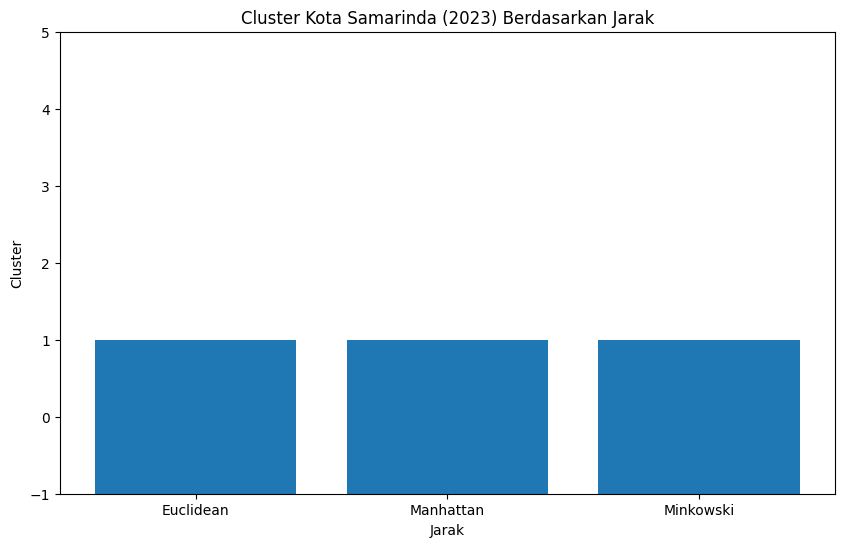

In [ ]:
import matplotlib.pyplot as plt

# Memilih data untuk kota Samarinda
samarinda_data = data23[data23['Kota'] == 'KOTA SAMARINDA']

# Menyiapkan data untuk plot
clusters_euclidean = samarinda_data['Cluster_Euclidean'].values
clusters_manhattan = samarinda_data['Cluster_Manhattan'].values
clusters_minkowski = samarinda_data['Cluster_Minkowski'].values
# Menyiapkan kolom jarak dan cluster untuk plot
distances = ['Euclidean', 'Manhattan', 'Minkowski']
clusters = [clusters_euclidean[0]+1, clusters_manhattan[0]+1, clusters_minkowski[0]+1] # Mengambil satu nilai cluster untuk setiap jarak

# Plot hasil clustering
plt.figure(figsize=(10, 6))
plt.bar(distances, clusters, bottom= -1)
plt.xlabel('Jarak')
plt.ylabel('Cluster')
plt.ylim(-1, 5)
plt.title('Cluster Kota Samarinda (2023) Berdasarkan Jarak')
plt.show()

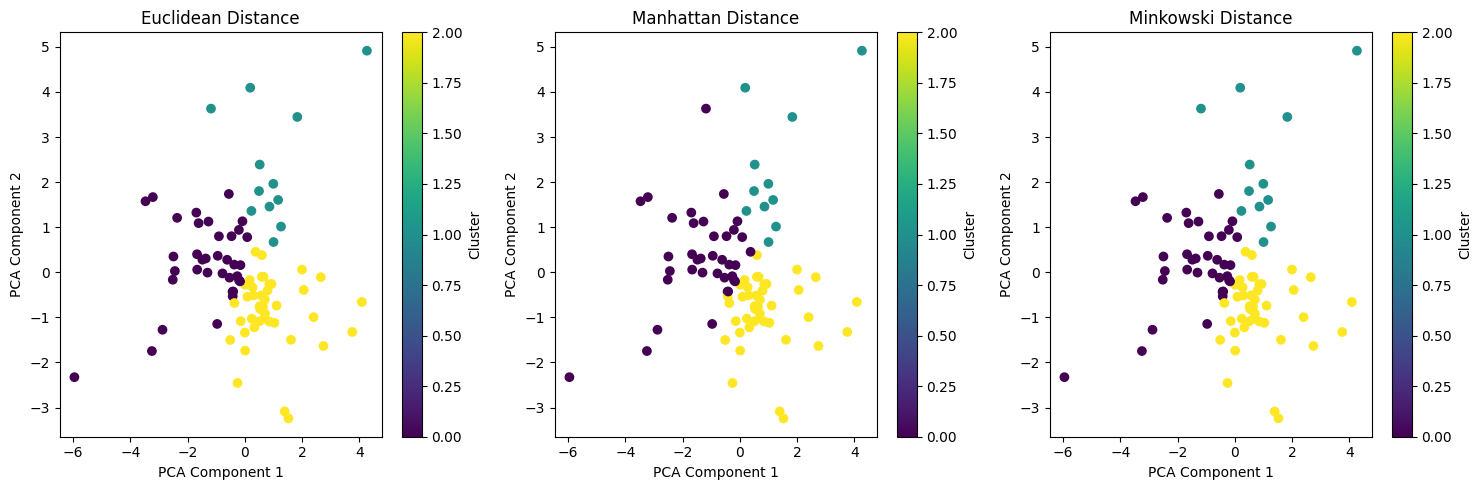

In [ ]:
clusters_euclidean = data20['Cluster_Euclidean'].values
clusters_manhattan = data20['Cluster_Manhattan'].values
clusters_minkowski = data20['Cluster_Minkowski'].values

# Scatter plot untuk Euclidean
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(reduced_features20[:, 0], reduced_features20[:, 1], c=clusters_euclidean, cmap='viridis')
plt.title('Euclidean Distance')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')

# Scatter plot untuk Manhattan
plt.subplot(1, 3, 2)
plt.scatter(reduced_features20[:, 0], reduced_features20[:, 1], c=clusters_manhattan, cmap='viridis')
plt.title('Manhattan Distance')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')

# Scatter plot untuk Minkowski
plt.subplot(1, 3, 3)
plt.scatter(reduced_features20[:, 0], reduced_features20[:, 1], c=clusters_minkowski, cmap='viridis')
plt.title('Minkowski Distance')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()

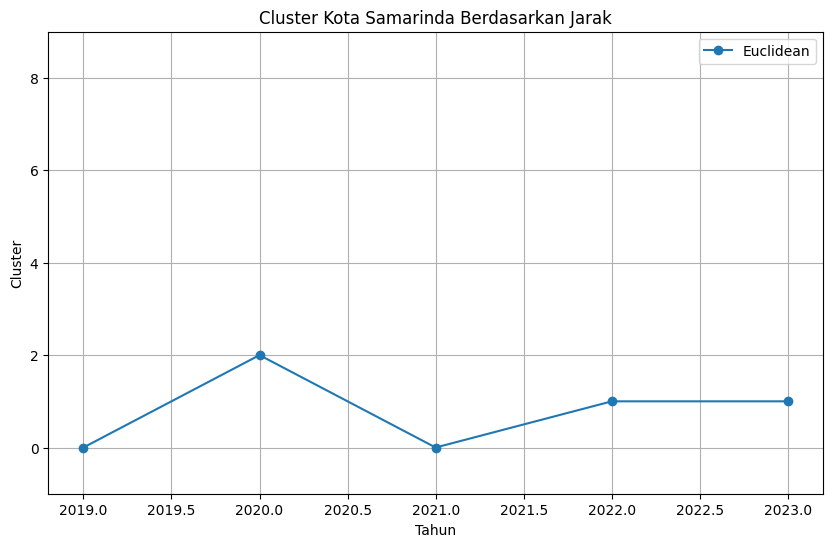

In [ ]:
# Memilih data untuk kota Samarinda
samarinda_data19 = data19[data19['Kota'] == 'KOTA SAMARINDA']
samarinda_data20 = data20[data20['Kota'] == 'KOTA SAMARINDA']
samarinda_data21 = data21[data21['Kota'] == 'KOTA SAMARINDA']
samarinda_data22 = data22[data22['Kota'] == 'KOTA SAMARINDA']
samarinda_data23 = data23[data23['Kota'] == 'KOTA SAMARINDA']


# Menyiapkan data untuk plot
years = [2019, 2020, 2021, 2022, 2023]
clusters_euclidean = [
    samarinda_data19['Cluster_Euclidean'].values[0],
    samarinda_data20['Cluster_Euclidean'].values[0],
    samarinda_data21['Cluster_Euclidean'].values[0],
    samarinda_data22['Cluster_Euclidean'].values[0],
    samarinda_data23['Cluster_Euclidean'].values[0]
]
clusters_manhattan = [
    samarinda_data19['Cluster_Manhattan'].values[0],
    samarinda_data20['Cluster_Manhattan'].values[0],
    samarinda_data21['Cluster_Manhattan'].values[0],
    samarinda_data22['Cluster_Manhattan'].values[0],
    samarinda_data23['Cluster_Manhattan'].values[0]
]
clusters_minkowski = [
    samarinda_data19['Cluster_Minkowski'].values[0],
    samarinda_data20['Cluster_Minkowski'].values[0],
    samarinda_data21['Cluster_Minkowski'].values[0],
    samarinda_data22['Cluster_Minkowski'].values[0],
    samarinda_data23['Cluster_Minkowski'].values[0]
]

# Plot hasil clustering
plt.figure(figsize=(10, 6))
plt.plot(years, clusters_euclidean, marker='o', label='Euclidean')
plt.xlabel('Tahun')
plt.ylabel('Cluster')
plt.ylim(-1, 9)
plt.title('Cluster Kota Samarinda Berdasarkan Jarak')
plt.legend()
plt.grid(True)
plt.show()



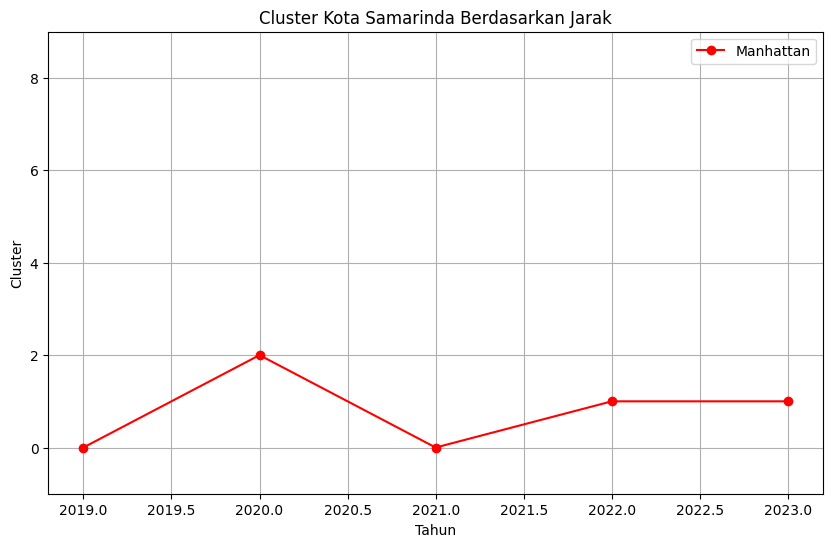

In [ ]:
# Plot hasil clustering
plt.figure(figsize=(10, 6))
plt.plot(years, clusters_manhattan, color='red', marker='o', label='Manhattan')
plt.xlabel('Tahun')
plt.ylabel('Cluster')
plt.ylim(-1, 9)
plt.title('Cluster Kota Samarinda Berdasarkan Jarak')
plt.legend()
plt.grid(True)
plt.show()

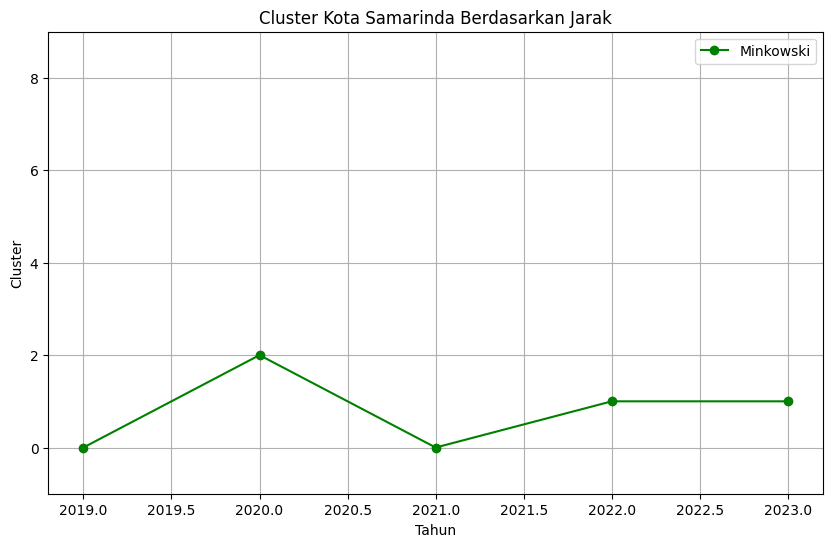

In [ ]:

# Plot hasil clustering
plt.figure(figsize=(10, 6))
plt.plot(years,  clusters_minkowski, color='green', marker='o', label='Minkowski')
plt.xlabel('Tahun')
plt.ylabel('Cluster')
plt.ylim(-1, 9)
plt.title('Cluster Kota Samarinda Berdasarkan Jarak')
plt.legend()
plt.grid(True)
plt.show()

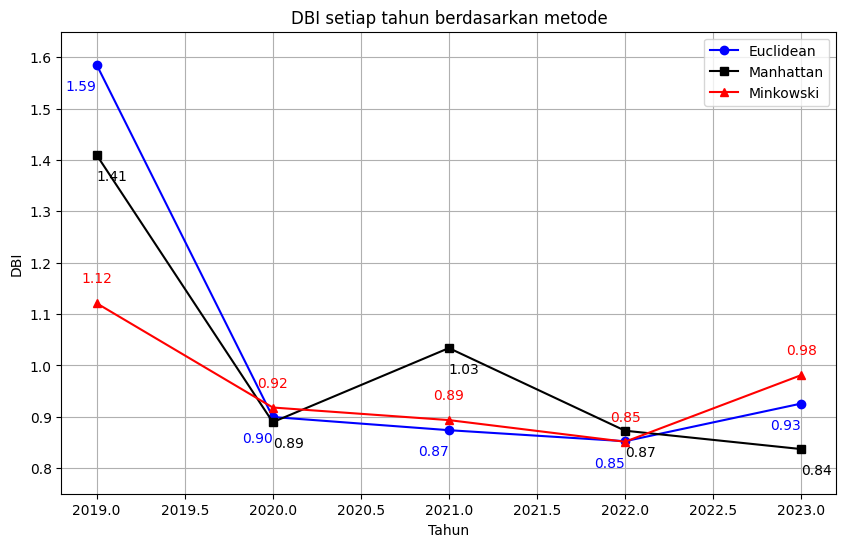

In [ ]:
# Menyiapkan data untuk plot
tahun = [2019, 2020, 2021, 2022, 2023]
dbi_ec = [dbi_euclidean19,
          dbi_euclidean20,
          dbi_euclidean21,
          dbi_euclidean22,
          dbi_euclidean23 ]
dbi_mh = [dbi_manhattan19,
          dbi_manhattan20,
          dbi_manhattan21,
          dbi_manhattan22,
          dbi_manhattan23 ]
dbi_mk = [dbi_minkowski19,
          dbi_minkowski20,
          dbi_minkowski21,
          dbi_minkowski22,
          dbi_minkowski23 ]

# Plot hasil clustering untuk semua metode dalam satu tampilan
plt.figure(figsize=(10, 6))
plt.plot(tahun, dbi_ec, marker='o',color='blue', label='Euclidean')
plt.plot(tahun, dbi_mh, marker='s',color='black', label='Manhattan')
plt.plot(tahun, dbi_mk, marker='^',color='red', label='Minkowski')

# Menampilkan nilai DBI di setiap titik
for i in range(len(tahun)):
    plt.text(tahun[i], dbi_ec[i] - 0.05, f'{dbi_ec[i]:.2f}', ha='right', color='blue')
    plt.text(tahun[i], dbi_mh[i] - 0.05, f'{dbi_mh[i]:.2f}', ha='left', color='black')
    plt.text(tahun[i], dbi_mk[i] + 0.04, f'{dbi_mk[i]:.2f}', ha='center', color='red')

plt.xlabel('Tahun')
plt.ylabel('DBI')
plt.ylim(0.75, 1.65)
plt.title('DBI setiap tahun berdasarkan metode')
plt.legend()
plt.grid(True)
plt.show()

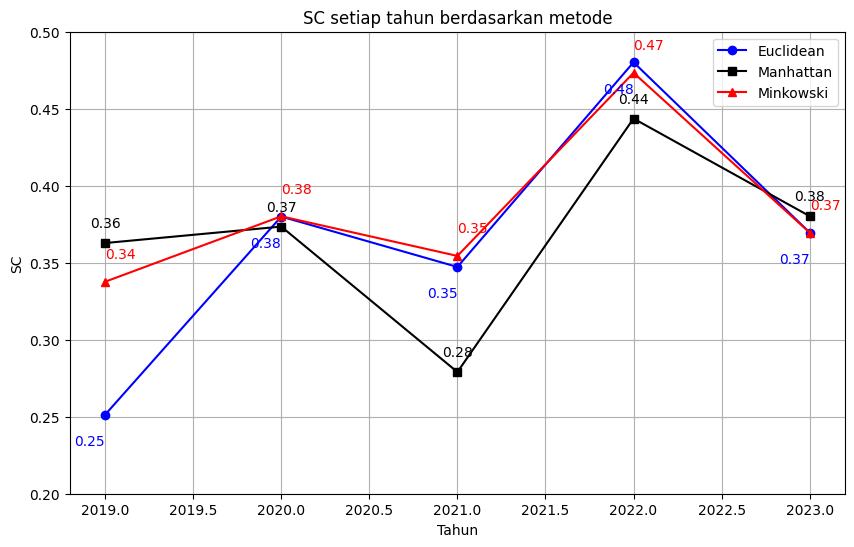

In [ ]:
# Menyiapkan data untuk plot
tahun = [2019, 2020, 2021, 2022, 2023]
sc_ec = [silhouette_euclidean19,
          silhouette_euclidean20,
          silhouette_euclidean21,
          silhouette_euclidean22,
          silhouette_euclidean23 ]
sc_mh =[silhouette_manhattan19,
          silhouette_manhattan20,
          silhouette_manhattan21,
          silhouette_manhattan22,
          silhouette_manhattan23 ]
sc_mk = [silhouette_minkowski19,
          silhouette_minkowski20,
          silhouette_minkowski21,
          silhouette_minkowski22,
          silhouette_minkowski23 ]

# Plot hasil clustering untuk semua metode dalam satu tampilan
plt.figure(figsize=(10, 6))
plt.plot(tahun, sc_ec, marker='o',color='blue', label='Euclidean')
plt.plot(tahun, sc_mh, marker='s',color='black', label='Manhattan')
plt.plot(tahun, sc_mk, marker='^',color='red', label='Minkowski')

# Menampilkan nilai sc di setiap titik
for i in range(len(tahun)):
    plt.text(tahun[i], sc_ec[i] - 0.02, f'{sc_ec[i]:.2f}', ha='right', color='blue')
    plt.text(tahun[i], sc_mh[i] + 0.01, f'{sc_mh[i]:.2f}', ha='center', color='black')
    plt.text(tahun[i], sc_mk[i] + 0.015, f'{sc_mk[i]:.2f}', ha='left', color='red')

plt.xlabel('Tahun')
plt.ylabel('SC')
plt.ylim(0.2, 0.5)
plt.title('SC setiap tahun berdasarkan metode')
plt.legend()
plt.grid(True)
plt.show()

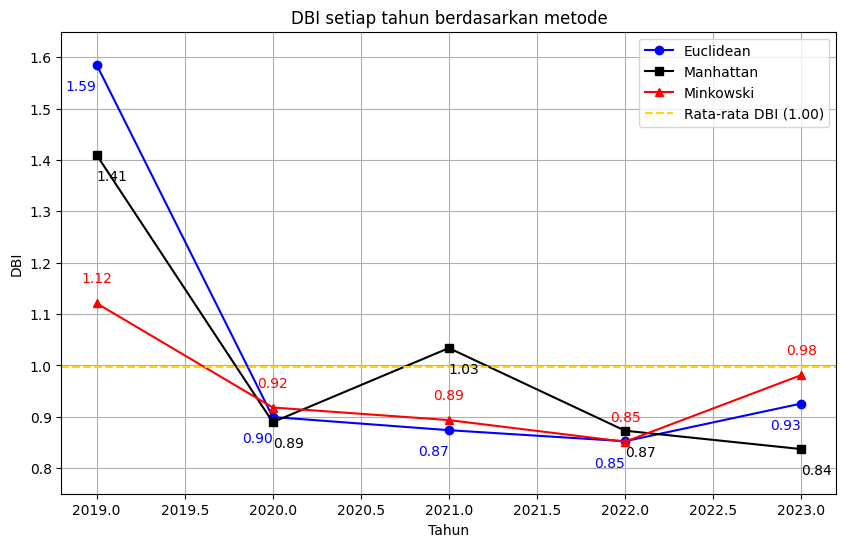

In [ ]:
# Menyiapkan data untuk plot
tahun = [2019, 2020, 2021, 2022, 2023]
dbi_ec = [dbi_euclidean19,
          dbi_euclidean20,
          dbi_euclidean21,
          dbi_euclidean22,
          dbi_euclidean23 ]
dbi_mh = [dbi_manhattan19,
          dbi_manhattan20,
          dbi_manhattan21,
          dbi_manhattan22,
          dbi_manhattan23 ]
dbi_mk = [dbi_minkowski19,
          dbi_minkowski20,
          dbi_minkowski21,
          dbi_minkowski22,
          dbi_minkowski23 ]

# Menggabungkan semua nilai DBI untuk menghitung rata-rata
all_dbi_values = dbi_ec + dbi_mh + dbi_mk
avg_dbi = sum(all_dbi_values) / len(all_dbi_values)

# Plot hasil clustering untuk semua metode dalam satu tampilan
plt.figure(figsize=(10, 6))
plt.plot(tahun, dbi_ec, marker='o',color='blue', label='Euclidean')
plt.plot(tahun, dbi_mh, marker='s',color='black', label='Manhattan')
plt.plot(tahun, dbi_mk, marker='^',color='red', label='Minkowski')

# Menampilkan nilai DBI di setiap titik
for i in range(len(tahun)):
    plt.text(tahun[i], dbi_ec[i] - 0.05, f'{dbi_ec[i]:.2f}', ha='right', color='blue')
    plt.text(tahun[i], dbi_mh[i] - 0.05, f'{dbi_mh[i]:.2f}', ha='left', color='black')
    plt.text(tahun[i], dbi_mk[i] + 0.04, f'{dbi_mk[i]:.2f}', ha='center', color='red')    # Teks di bawah titik Minkowski

# Menambahkan garis horizontal pada rata-rata DBI
plt.axhline(y=avg_dbi, color='gold', linestyle='--', label=f'Rata-rata DBI ({avg_dbi:.2f})')

plt.xlabel('Tahun')
plt.ylabel('DBI')
plt.ylim(0.75, 1.65)
plt.title('DBI setiap tahun berdasarkan metode')
plt.legend()
plt.grid(True)
plt.show()

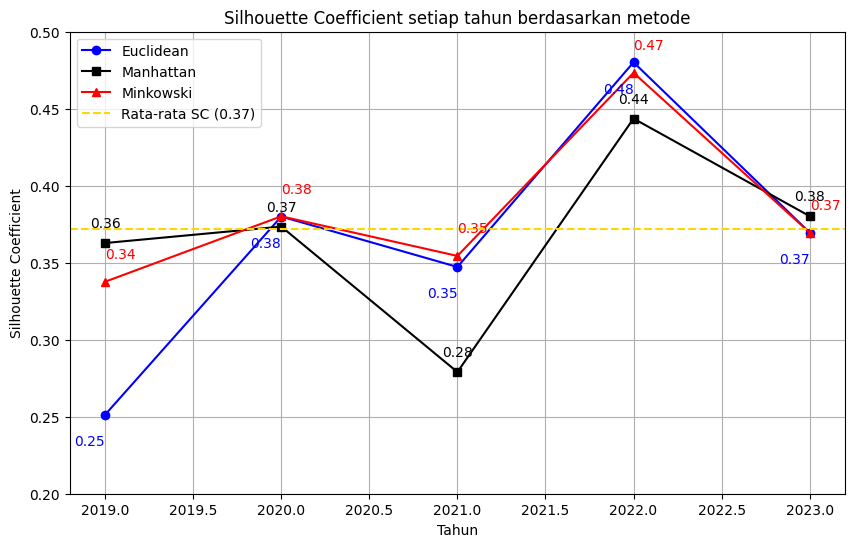

In [ ]:
# Menyiapkan data untuk plot
tahun = [2019, 2020, 2021, 2022, 2023]
sc_ec = [silhouette_euclidean19,
          silhouette_euclidean20,
          silhouette_euclidean21,
          silhouette_euclidean22,
          silhouette_euclidean23 ]
sc_mh = [silhouette_manhattan19,
          silhouette_manhattan20,
          silhouette_manhattan21,
          silhouette_manhattan22,
          silhouette_manhattan23 ]
sc_mk = [silhouette_minkowski19,
          silhouette_minkowski20,
          silhouette_minkowski21,
          silhouette_minkowski22,
          silhouette_minkowski23 ]

# Menggabungkan semua nilai SC untuk menghitung rata-rata
all_sc_values = sc_ec + sc_mh + sc_mk
avg_sc = sum(all_sc_values) / len(all_sc_values)

# Plot hasil clustering untuk semua metode dalam satu tampilan
plt.figure(figsize=(10, 6))
plt.plot(tahun, sc_ec, marker='o',color='blue', label='Euclidean')
plt.plot(tahun, sc_mh, marker='s',color='black', label='Manhattan')
plt.plot(tahun, sc_mk, marker='^',color='red', label='Minkowski')

# Menampilkan nilai sc di setiap titik
for i in range(len(tahun)):
    plt.text(tahun[i], sc_ec[i] - 0.02, f'{sc_ec[i]:.2f}', ha='right', color='blue')
    plt.text(tahun[i], sc_mh[i] + 0.01, f'{sc_mh[i]:.2f}', ha='center', color='black')
    plt.text(tahun[i], sc_mk[i] + 0.015, f'{sc_mk[i]:.2f}', ha='left', color='red')   # Teks di bawah titik Minkowski

# Menambahkan garis horizontal pada rata-rata SC
plt.axhline(y=avg_sc, color='gold', linestyle='--', label=f'Rata-rata SC ({avg_sc:.2f})')

plt.xlabel('Tahun')
plt.ylabel('Silhouette Coefficient')
plt.ylim(0.2, 0.5)  # Sesuaikan batasan y untuk SC jika diperlukan
plt.title('Silhouette Coefficient setiap tahun berdasarkan metode')
plt.legend()
plt.grid(True)
plt.show()

# HASIL CLUSTERING

In [ ]:
dataLevel = data19
# Add cluster assignments to the original DataFrame
dataLevel['Cluster_Euclidean'] = labels_euclidean19.astype(int)
dataLevel['Cluster_Manhattan'] = labels_manhattan19.astype(int)
dataLevel['Cluster_Minkowski'] = labels_minkowski19.astype(int)

# Determine inflation levels based on clusters
# Assuming higher centroid values correspond to higher inflation levels
cluster_medians = np.array([np.median(features19[labels_euclidean19 == i], axis=0) for i in range(k)])
sorted_clusters = np.argsort(np.mean(cluster_medians, axis=1))

inflation_levels = ['Low', 'Medium', 'High']
cluster_inflation_labels = {sorted_clusters[i]: inflation_levels[i] for i in range(k)}

dataLevel['Inflation_Level_Euclidean'] = dataLevel['Cluster_Euclidean'].map(cluster_inflation_labels)
dataLevel['Inflation_Level_Manhattan'] = dataLevel['Cluster_Manhattan'].map(cluster_inflation_labels)
dataLevel['Inflation_Level_Minkowski'] = dataLevel['Cluster_Minkowski'].map(cluster_inflation_labels)

# Print the table with cluster assignments and inflation levels
dataLevel = pd.DataFrame(dataLevel)
dataLevel

# cluster_medians

,Kota,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Cluster_Euclidean,Cluster_Manhattan,Cluster_Minkowski,Inflation_Level_Euclidean,Inflation_Level_Manhattan,Inflation_Level_Minkowski
0,KOTA MEULABOH,0.91,-0.71,0.39,0.18,1.33,1.3,0.21,0.2,0.91,0.18,-0.5,-0.19,0,0,0,Low,Low,Low
1,KOTA BANDA ACEH,0.43,-0.54,-0.44,0.36,1.48,0.38,-0.24,0.07,-0.55,0.07,-0.1,0.46,1,0,0,Medium,Low,Low
2,KOTA LHOKSEUMAWE,0.14,-0.68,-0.45,0.64,0.86,0.3,0.22,-0.54,-0.42,0.53,0.02,0.6,1,0,0,Medium,Low,Low
3,KOTA SIBOLGA,-0.03,-0.7,0.24,1.15,0.67,2.25,1.88,-0.58,-1.94,-0.37,-0.48,0.51,0,1,1,Low,Medium,Medium
4,KOTA PEMATANG SIANTAR,0.01,-0.29,0.27,1.03,0.67,0.91,0.29,-0.4,-1.18,0.01,-0.1,0.34,1,1,1,Medium,Medium,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,MANOKWARI,1.03,-0.08,0.08,-0.55,2.25,0.38,-0.57,0.81,-0.51,0.88,0.3,0.68,2,2,2,High,High,High
86,KOTA SORONG,0.43,-0.81,-0.77,0.13,1.37,0.21,0.63,0.19,0.23,-0.39,-0.86,0.66,1,0,0,Medium,Low,Low
87,MERAUKE,-0.01,-2.11,0.31,1.2,-0.49,0.22,-0.49,-0.18,-0.99,-0.13,1.21,0.86,0,1,1,Low,Medium,Medium
88,TIMIKA,0.375122,-0.233171,-0.003659,0.407317,0.793659,0.58439,0.187561,-0.034024,-0.32,0.017683,0.145244,0.366341,1,0,0,Medium,Low,Low


In [ ]:
dataLevel = data20
# Add cluster assignments to the original DataFrame
dataLevel['Cluster_Euclidean'] = labels_euclidean20.astype(int)
dataLevel['Cluster_Manhattan'] = labels_manhattan20.astype(int)
dataLevel['Cluster_Minkowski'] = labels_minkowski20.astype(int)

# Determine inflation levels based on clusters
# Assuming higher centroid values correspond to higher inflation levels
cluster_medians = np.array([np.median(features20[labels_euclidean20 == i], axis=0) for i in range(k)])
sorted_clusters = np.argsort(np.mean(cluster_medians, axis=1))

inflation_levels = ['Low', 'Medium', 'High']
# cluster_inflation_labels = {sorted_clusters[i]: inflation_levels[i] for i in range(k)}

dataLevel['Inflation_Level_Euclidean'] = dataLevel['Cluster_Euclidean'].map(cluster_inflation_labels)
dataLevel['Inflation_Level_Manhattan'] = dataLevel['Cluster_Manhattan'].map(cluster_inflation_labels)
dataLevel['Inflation_Level_Minkowski'] = dataLevel['Cluster_Minkowski'].map(cluster_inflation_labels)

# Print the table with cluster assignments and inflation levels
dataLevel = pd.DataFrame(dataLevel)
dataLevel

# cluster_medians

,Kota,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Cluster_Euclidean,Cluster_Manhattan,Cluster_Minkowski,Inflation_Level_Euclidean,Inflation_Level_Manhattan,Inflation_Level_Minkowski
0,KOTA MEULABOH,1.44,-0.10,0.52,-0.22,0.45,-0.19,-0.09,0.88,0.15,0.32,-0.01,1.02,0,0,0,Low,Low,Low
1,KOTA BANDA ACEH,0.77,0.54,0.61,-0.08,0.31,-0.18,-0.34,0.44,-0.32,0.62,0.19,0.85,0,0,0,Low,Low,Low
2,KOTA LHOKSEUMAWE,0.08,0.49,0.64,-0.29,0.05,-0.07,-0.35,0.30,0.24,0.86,0.30,1.27,0,0,0,Low,Low,Low
3,KOTA SIBOLGA,0.20,0.69,-0.79,-0.66,0.17,0.13,-0.31,-0.01,0.29,1.04,0.34,1.32,0,0,0,Low,Low,Low
4,KOTA PEMATANG SIANTAR,0.62,0.12,-0.12,-0.40,0.37,-0.13,-0.76,0.20,0.29,0.46,0.64,1.47,0,0,0,Low,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,MANOKWARI,-0.77,1.07,-1.30,0.15,0.16,0.48,-1.09,0.49,-0.63,-1.81,1.11,1.30,1,1,1,Medium,Medium,Medium
86,KOTA SORONG,-0.35,0.10,-0.09,0.26,-0.06,0.46,0.60,-0.33,-0.42,-0.61,0.70,0.90,2,2,2,High,High,High
87,MERAUKE,0.42,0.93,-1.53,0.56,0.70,0.20,-0.48,-0.64,0.21,-0.61,0.66,0.66,1,1,1,Medium,Medium,Medium
88,TIMIKA,1.00,0.81,-1.91,0.72,0.90,0.92,1.45,0.41,-0.83,0.24,0.03,0.35,2,2,2,High,High,High


In [ ]:
dataLevel = data21
# Add cluster assignments to the original DataFrame
dataLevel['Cluster_Euclidean'] = labels_euclidean21.astype(int)
dataLevel['Cluster_Manhattan'] = labels_manhattan21.astype(int)
dataLevel['Cluster_Minkowski'] = labels_minkowski21.astype(int)

# Determine inflation levels based on clusters
# Assuming higher centroid values correspond to higher inflation levels
cluster_medians = np.array([np.median(features21[labels_euclidean21 == i], axis=0) for i in range(k)])
sorted_clusters = np.argsort(np.mean(cluster_medians, axis=1))

inflation_levels = ['Low', 'Medium', 'High']
# cluster_inflation_labels = {sorted_clusters[i]: inflation_levels[i] for i in range(k)}

dataLevel['Inflation_Level_Euclidean'] = dataLevel['Cluster_Euclidean'].map(cluster_inflation_labels)
dataLevel['Inflation_Level_Manhattan'] = dataLevel['Cluster_Manhattan'].map(cluster_inflation_labels)
dataLevel['Inflation_Level_Minkowski'] = dataLevel['Cluster_Minkowski'].map(cluster_inflation_labels)

# Print the table with cluster assignments and inflation levels
dataLevel = pd.DataFrame(dataLevel)
dataLevel

,Kota,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Cluster_Euclidean,Cluster_Manhattan,Cluster_Minkowski,Inflation_Level_Euclidean,Inflation_Level_Manhattan,Inflation_Level_Minkowski
0,KOTA MEULABOH,0.83,-0.95,-0.57,0.54,0.79,-0.06,0.20,-0.03,-0.59,0.62,0.48,0.81,0,0,0,Low,Low,Low
1,KOTA BANDA ACEH,0.77,-0.56,-0.45,0.53,0.17,-0.05,-0.14,0.26,-0.13,0.38,0.87,0.74,1,1,1,Medium,Medium,Medium
2,KOTA LHOKSEUMAWE,0.80,-0.70,-0.09,0.42,0.19,-0.07,-0.07,-0.21,-0.16,0.45,0.82,0.59,1,1,1,Medium,Medium,Medium
3,KOTA SIBOLGA,0.74,-0.68,-0.29,0.35,-0.30,0.31,0.62,0.05,0.32,0.11,0.47,0.17,1,0,1,Medium,Low,Medium
4,KOTA PEMATANG SIANTAR,1.13,-0.46,-0.23,0.05,0.08,0.23,-0.03,-0.07,0.31,-0.36,0.58,0.85,1,1,1,Medium,Medium,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,MANOKWARI,-0.58,-0.21,0.93,-0.28,1.82,0.99,-0.60,-0.72,-0.62,0.96,0.68,1.02,2,2,2,High,High,High
86,KOTA SORONG,0.41,-0.53,0.74,0.18,0.83,1.12,1.51,-1.04,-0.76,0.04,-0.30,1.27,0,0,0,Low,Low,Low
87,MERAUKE,-0.09,0.46,0.85,-0.04,0.09,0.28,0.04,-0.99,-0.75,0.49,-0.17,1.53,2,2,2,High,High,High
88,TIMIKA,-0.07,0.13,-0.41,1.27,-0.83,0.35,0.52,-0.03,-0.30,-0.13,0.35,1.24,0,0,0,Low,Low,Low


In [ ]:
dataLevel = data22
# Add cluster assignments to the original DataFrame
dataLevel['Cluster_Euclidean'] = labels_euclidean22.astype(int)
dataLevel['Cluster_Manhattan'] = labels_manhattan22.astype(int)
dataLevel['Cluster_Minkowski'] = labels_minkowski22.astype(int)

# Determine inflation levels based on clusters
# Assuming higher centroid values correspond to higher inflation levels
cluster_medians = np.array([np.median(features22[labels_euclidean22 == i], axis=0) for i in range(k)])
sorted_clusters = np.argsort(np.mean(cluster_medians, axis=1))

inflation_levels = ['Low', 'Medium', 'High']
# cluster_inflation_labels = {sorted_clusters[i]: inflation_levels[i] for i in range(k)}

dataLevel['Inflation_Level_Euclidean'] = dataLevel['Cluster_Euclidean'].map(cluster_inflation_labels)
dataLevel['Inflation_Level_Manhattan'] = dataLevel['Cluster_Manhattan'].map(cluster_inflation_labels)
dataLevel['Inflation_Level_Minkowski'] = dataLevel['Cluster_Minkowski'].map(cluster_inflation_labels)

# Print the table with cluster assignments and inflation levels
dataLevel = pd.DataFrame(dataLevel)
dataLevel

,Kota,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Cluster_Euclidean,Cluster_Manhattan,Cluster_Minkowski,Inflation_Level_Euclidean,Inflation_Level_Manhattan,Inflation_Level_Minkowski
0,KOTA MEULABOH,0.95,-0.87,0.69,1.22,1.26,1.33,1.12,-0.33,0.49,0.19,-0.62,0.98,0,0,0,Low,Low,Low
1,KOTA BANDA ACEH,1.01,-0.34,0.59,1.23,0.92,0.76,0.98,-0.32,0.78,-0.49,0.11,0.64,1,1,1,Medium,Medium,Medium
2,KOTA LHOKSEUMAWE,1.12,-0.99,0.85,1.25,1.03,0.45,0.47,-0.98,0.90,0.04,-0.36,1.51,0,0,0,Low,Low,Low
3,KOTA SIBOLGA,1.53,-0.21,0.93,0.38,0.85,1.12,1.07,-0.02,0.33,-1.09,-0.05,1.44,0,0,0,Low,Low,Low
4,KOTA PEMATANG SIANTAR,0.96,0.18,0.77,0.39,0.62,1.36,0.04,-0.79,1.50,-0.54,-0.08,1.61,0,0,0,Low,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,MANOKWARI,0.02,-1.43,1.34,1.07,1.54,0.71,0.57,-0.79,-0.64,0.76,0.94,1.85,2,2,2,High,High,High
86,KOTA SORONG,0.99,-1.30,0.22,1.02,0.61,0.39,1.26,-0.82,1.49,-0.90,0.30,0.01,1,1,1,Medium,Medium,Medium
87,MERAUKE,0.88,0.35,1.86,0.74,-0.02,-0.19,0.58,-0.85,0.07,0.12,-0.05,1.33,1,1,1,Medium,Medium,Medium
88,TIMIKA,-0.42,-0.24,0.63,0.92,0.59,1.04,1.61,0.48,-0.59,0.73,0.34,0.70,2,2,2,High,High,High


In [ ]:
dataLevel = data23
# Add cluster assignments to the original DataFrame
dataLevel['Cluster_Euclidean'] = labels_euclidean23.astype(int)
dataLevel['Cluster_Manhattan'] = labels_manhattan23.astype(int)
dataLevel['Cluster_Minkowski'] = labels_minkowski23.astype(int)

# Determine inflation levels based on clusters
# Assuming higher centroid values correspond to higher inflation levels
cluster_medians = np.array([np.median(features23[labels_euclidean23 == i], axis=0) for i in range(k)])
sorted_clusters = np.argsort(np.mean(cluster_medians, axis=1))

inflation_levels = ['Low', 'Medium', 'High']
# cluster_inflation_labels = {sorted_clusters[i]: inflation_levels[i] for i in range(k)}

dataLevel['Inflation_Level_Euclidean'] = dataLevel['Cluster_Euclidean'].map(cluster_inflation_labels)
dataLevel['Inflation_Level_Manhattan'] = dataLevel['Cluster_Manhattan'].map(cluster_inflation_labels)
dataLevel['Inflation_Level_Minkowski'] = dataLevel['Cluster_Minkowski'].map(cluster_inflation_labels)

# Print the table with cluster assignments and inflation levels
dataLevel = pd.DataFrame(dataLevel)
dataLevel

,Kota,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Cluster_Euclidean,Cluster_Manhattan,Cluster_Minkowski,Inflation_Level_Euclidean,Inflation_Level_Manhattan,Inflation_Level_Minkowski
0,KOTA MEULABOH,0.76,0.39,-0.66,-0.70,0.58,0.47,0.22,0.06,0.45,0.30,0.22,-0.67,0,0,0,Low,Low,Low
1,KOTA BANDA ACEH,0.61,0.57,-0.57,0.18,0.13,0.06,0.30,-0.27,0.14,-0.25,0.38,0.25,0,0,0,Low,Low,Low
2,KOTA LHOKSEUMAWE,0.75,0.51,-0.31,-0.42,0.51,0.07,-0.04,0.03,0.27,-0.11,0.19,0.12,0,0,0,Low,Low,Low
3,KOTA SIBOLGA,1.46,0.32,-0.66,0.27,0.16,0.62,0.35,0.13,0.44,-0.19,-0.19,0.08,0,0,0,Low,Low,Low
4,KOTA PEMATANG SIANTAR,0.98,-0.04,-0.30,-0.25,0.45,0.52,0.10,-0.11,0.16,-0.15,0.37,0.56,0,0,0,Low,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,MANOKWARI,0.03,-0.73,-0.64,1.39,0.45,0.85,1.43,0.55,-1.70,0.06,-0.41,1.13,2,2,2,High,High,High
86,KOTA SORONG,0.96,-0.24,0.92,0.01,0.59,0.73,0.18,-0.24,-0.32,0.74,-0.49,0.23,1,1,1,Medium,Medium,Medium
87,MERAUKE,0.41,0.10,0.90,1.05,1.03,1.09,-0.08,-0.19,-1.05,0.28,0.30,0.78,2,2,2,High,High,High
88,TIMIKA,-0.60,-0.59,0.64,1.40,0.75,0.76,0.83,0.48,-0.99,-0.39,0.84,0.36,2,2,2,High,High,High
